In [2]:
# General Libraries
import os
import math
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Google Colab
from google.colab import drive
import gdown
import joblib

# Scikit-learn (Data Processing & ML)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error

# TensorFlow & Keras (Deep Learning)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.models import load_model
import gc
import tensorflow.keras.backend as K

In [3]:
# Mount Google Drive
# Define Google Drive Folder ID
FOLDER_ID = "1VM2BEzEf6DWlQJjtFA5V4z5oq1DteCGd"

# Define Local Folder Path
local_data_folder = "/content/Building_59_clean_data/"

# Download the Dataset
if not os.path.exists(local_data_folder):  # Avoid downloading multiple times
    os.makedirs(local_data_folder, exist_ok=True)
    gdown.download_folder(f"https://drive.google.com/drive/folders/{FOLDER_ID}", output=local_data_folder, quiet=False, use_cookies=False)

# Load CSV Files Dynamically
csv_files = glob.glob(os.path.join(local_data_folder, "**", "*.csv"), recursive = True)

# Print Found Files
print(f" Found {len(csv_files)} CSV files in the dataset!")

Retrieving folder contents


Retrieving folder 1lE1_W-Q1AM-C9armgXluf6o02UlPEART Building_59_clean_data
Processing file 1PppEv6dsCvvqslRmgU_tA_RXrvF2cPfl ashp_cw.csv
Processing file 1nJS5GA0NsyoI4FTFI7uY-JaqlCXHB3So ashp_hw.csv
Processing file 1k3kPGBZz-4sH1H6tmu76nlYprZAZqMif ashp_meter.csv
Processing file 1pfyD3P0TW6HKosOPhwkk59Y3lE0FlAMU ele.csv
Processing file 1rB7cz0fbuiC_PF34GG-1MKAn_s22JJgi hp_hws_temp.csv
Processing file 1KacWR2exzpd_qlYmPA-xgJKlpKzuJ1r2 occ.csv
Processing file 14rrxFDmyDiJR5KAw98-F6h_Xr73ElA6u rtu_econ_sp.csv
Processing file 126OBRZJs8pcSmmsXg7BQFiAOagFauxwq rtu_fan_spd.csv
Processing file 110ijIyeRkV3Zn22YjzG0duYYYaJZUiJm rtu_ma_t.csv
Processing file 1SDzXOYCmM2HY8Em7APRIk8nNCXgXiAB2 rtu_oa_damper.csv
Processing file 1r0q-GfdfsEQe7wq2Jxly4NoiUzwvkGZO rtu_oa_fr.csv
Processing file 1SUtGC42hFIoVTgr62iGx74f4jVrijMqW rtu_oa_t.csv
Processing file 1yG3DGWb4fUxJtdcvZZRmTgHSRfBhH8rs rtu_plenum_p.csv
Processing file 1AAUrUJ8K-4b1PbzWQ5WTuMvrpEsEtewY rtu_ra_t.csv
Processing file 1lQWMYGPU8qdwKS0Xj

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1PppEv6dsCvvqslRmgU_tA_RXrvF2cPfl
To: /content/Building_59_clean_data/Building_59/Building_59_clean_data/ashp_cw.csv
100%|██████████| 1.73M/1.73M [00:00<00:00, 80.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nJS5GA0NsyoI4FTFI7uY-JaqlCXHB3So
To: /content/Building_59_clean_data/Building_59/Building_59_clean_data/ashp_hw.csv
100%|██████████| 5.55M/5.55M [00:00<00:00, 17.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1k3kPGBZz-4sH1H6tmu76nlYprZAZqMif
To: /content/Building_59_clean_data/Building_59/Building_59_clean_data/ashp_meter.csv
100%|██████████| 1.50M/1.50M [00:00<00:00, 110MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pfyD3P0TW6HKosOPhwkk59Y3lE0FlAMU
To: /content/Building_59_clean_data/Building_59/Building_59_clean_data/ele.csv
100%|██████████| 6.16M/6.16M [00:00<00:00, 15.5MB/s]
Downloadi

 Found 27 CSV files in the dataset!



Download completed


In [4]:
# Check all .csv files
print("🔍 Found CSV files:", csv_files)

all_columns = set()
for file in csv_files:
    df = pd.read_csv(file, nrows=5)  # Load only first 5 rows to check columns
    all_columns.update(df.columns)   # Add to set to avoid duplicates

# Sort and display all columns
all_columns = sorted(all_columns)
print(" All Column Names in Dataset:")
print(all_columns)

# for file in csv_files:
#     print(f"📂 File: {os.path.basename(file)}")  # Print filename
#     df = pd.read_csv(file)
#     display(df.head(5))  # Display the first 5 rows
#     print("\n" + "="*80 + "\n")  # Separator for readability


🔍 Found CSV files: ['/content/Building_59_clean_data/Building_59/Building_59_clean_data/rtu_sa_t.csv', '/content/Building_59_clean_data/Building_59/Building_59_clean_data/hp_hws_temp.csv', '/content/Building_59_clean_data/Building_59/Building_59_clean_data/site_weather.csv', '/content/Building_59_clean_data/Building_59/Building_59_clean_data/rtu_ra_t.csv', '/content/Building_59_clean_data/Building_59/Building_59_clean_data/ashp_meter.csv', '/content/Building_59_clean_data/Building_59/Building_59_clean_data/rtu_econ_sp.csv', '/content/Building_59_clean_data/Building_59/Building_59_clean_data/uft_fan_spd.csv', '/content/Building_59_clean_data/Building_59/Building_59_clean_data/uft_hw_valve.csv', '/content/Building_59_clean_data/Building_59/Building_59_clean_data/ashp_cw.csv', '/content/Building_59_clean_data/Building_59/Building_59_clean_data/zone_temp_interior.csv', '/content/Building_59_clean_data/Building_59/Building_59_clean_data/rtu_oa_fr.csv', '/content/Building_59_clean_data/Build

In [5]:
# Merge all essential .csv files and keep only data from the year 2020

essential_sensor_files = [
    "ele.csv",  # Electrical meter data
    "rtu_sa_t.csv",  # HVAC Supply Air temperature
    "zone_temp_interior.csv",  # Interior zone temperatures
    "zone_temp_exterior.csv",  # Exterior temperature
    "rtu_fan_spd.csv",  # Fan speeds for HVAC units
    "ashp_meter.csv",  # Air source heat pump energy use
    "ashp_cw.csv", "ashp_hw.csv",  # Chilled water & Hot water from ASHP
]

# Filter only the necessary files
filtered_files = [f for f in csv_files if os.path.basename(f) in essential_sensor_files]
print(f"🔍 Found {len(filtered_files)} essential sensor CSV files!")

# Create a full timestamp range (2020, 5-minute intervals)
full_time_index = pd.date_range(start="2020-01-01 00:00:00", end="2020-12-31 23:55:00", freq="5min")
full_time_df = pd.DataFrame({"date": full_time_index})

# Load files, fix timestamps, and align to full time range
dfs = []
for file in filtered_files:
    df = pd.read_csv(file)

    # Print shape to check if files are loading correctly
    print(f"📂 Loaded {os.path.basename(file)} with shape {df.shape}")

    # Ensure date column is datetime
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

    # Drop rows where date couldn't be parsed
    df = df.dropna(subset=["date"])

    # Sort and reset index
    df = df.sort_values("date").reset_index(drop=True)

    # Merge with full timestamp range using outer join
    df = full_time_df.merge(df, on="date", how="left")

    # Store cleaned dataset
    dfs.append(df)

# Merge all datasets into one using an outer join
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on="date", how="outer", suffixes=("", "_dup"))

# Drop any duplicate columns that may have been added
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

# Display final shape & first rows
print("Final merged dataset shape:", merged_df.shape)
display(merged_df.head(20))

🔍 Found 8 essential sensor CSV files!
📂 Loaded rtu_sa_t.csv with shape (1407323, 5)
📂 Loaded ashp_meter.csv with shape (43978, 2)
📂 Loaded ashp_cw.csv with shape (43979, 4)
📂 Loaded zone_temp_interior.csv with shape (149696, 17)
📂 Loaded ashp_hw.csv with shape (124487, 4)
📂 Loaded ele.csv with shape (103048, 7)
📂 Loaded rtu_fan_spd.csv with shape (1382051, 9)
📂 Loaded zone_temp_exterior.csv with shape (1511904, 52)
Final merged dataset shape: (112368, 93)


date  rtu_001_sa_temp  rtu_002_sa_temp  rtu_003_sa_temp  \
0  2020-01-01 00:00:00             62.5             67.7             68.2   
1  2020-01-01 00:05:00             65.2             67.4             68.7   
2  2020-01-01 00:10:00             64.6             68.7             68.4   
3  2020-01-01 00:15:00             63.1             68.3             68.1   
4  2020-01-01 00:20:00             63.3             67.1             68.0   
5  2020-01-01 00:25:00             64.7             67.2             68.0   
6  2020-01-01 00:30:00             61.9             67.9             67.7   
7  2020-01-01 00:35:00             64.9             68.6             67.8   
8  2020-01-01 00:40:00             64.9             68.8             68.1   
9  2020-01-01 00:45:00             62.7             69.1             67.3   
10 2020-01-01 00:50:00             64.5             68.9             67.8   
11 2020-01-01 00:55:00             64.7             67.6             67.1   
12 2020-01-01 01:00:00             64.7             66.6             67.8   
13 2020-01-01 01:05:00             69.9             67.0             67.9   
14 2020-01-01 01:10:00             71.1             68.0             67.5   
15 2020-01-01 01:15:00             71.4             68.5             67.3   
16 2020-01-01 01:20:00             70.4             69.0             67.5   
17 2020-01-01 01:25:00             70.6             69.1             67.7   
18 2020-01-01 01:30:00             70.6             68.0             67.4   
19 2020-01-01 01:35:00             70.3             66.7             67.5   

    rtu_004_sa_temp  aru_001_power_mbtuph  aru_001_cwr_temp  \
0              67.4                   NaN               NaN   
1              67.7                   NaN               NaN   
2              67.6                   NaN               NaN   
3              67.3                   NaN               NaN   
4              67.4                   NaN               NaN   
5              67.1                   NaN               NaN   
6              68.4                   NaN               NaN   
7              68.9                   NaN               NaN   
8              67.0                   NaN               NaN   
9              68.3                   NaN               NaN   
10             68.5                   NaN               NaN   
11             68.0                   NaN               NaN   
12             68.0                   NaN               NaN   
13             67.7                   NaN               NaN   
14             67.8                   NaN               NaN   
15             67.7                   NaN               NaN   
16             67.2                   NaN               NaN   
17             67.6                   NaN               NaN   
18             67.4                   NaN               NaN   
19             67.4                   NaN               NaN   

    aru_001_cws_fr_gpm  aru_001_cws_temp  cerc_templogger_1  ...  \
0                  NaN               NaN             22.687  ...   
1                  NaN               NaN                NaN  ...   
2                  NaN               NaN             22.750  ...   
3                  NaN               NaN                NaN  ...   
4                  NaN               NaN             22.750  ...   
5                  NaN               NaN                NaN  ...   
6                  NaN               NaN             22.875  ...   
7                  NaN               NaN                NaN  ...   
8                  NaN               NaN             22.812  ...   
9                  NaN               NaN                NaN  ...   
10                 NaN               NaN             22.625  ...   
11                 NaN               NaN                NaN  ...   
12                 NaN               NaN             22.687  ...   
13                 NaN               NaN                NaN  ...   
14                 NaN               NaN             22.

In [6]:
# Verify the data

print(merged_df.columns)
#display(merged_df.head(500))
print("Total rows:", merged_df.shape[0])
print("Total columns:", merged_df.shape[1])
print(merged_df.head())
print("Columns in dataset:", merged_df.columns)
# Check the percentage of missing values in each column

# Count missing values and calculate percentage
missing_data = merged_df.isnull().sum()
missing_percentage = (missing_data / len(merged_df)) * 100

# Combine into a DataFrame
missing_summary = pd.DataFrame({
    "Missing Count": missing_data,
    "Missing Percentage": missing_percentage
})

# Display missing data sorted by percentage
missing_summary = missing_summary.sort_values(by="Missing Percentage", ascending=False)
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
print(missing_summary)

Index(['date', 'rtu_001_sa_temp', 'rtu_002_sa_temp', 'rtu_003_sa_temp',
       'rtu_004_sa_temp', 'aru_001_power_mbtuph', 'aru_001_cwr_temp',
       'aru_001_cws_fr_gpm', 'aru_001_cws_temp', 'cerc_templogger_1',
       'cerc_templogger_10', 'cerc_templogger_11', 'cerc_templogger_12',
       'cerc_templogger_13', 'cerc_templogger_14', 'cerc_templogger_15',
       'cerc_templogger_16', 'cerc_templogger_2', 'cerc_templogger_3',
       'cerc_templogger_4', 'cerc_templogger_5', 'cerc_templogger_6',
       'cerc_templogger_7', 'cerc_templogger_8', 'cerc_templogger_9',
       'aru_001_hwr_temp', 'aru_001_hws_fr_gpm', 'aru_001_hws_temp', 'mels_S',
       'lig_S', 'mels_N', 'hvac_N', 'hvac_S', 'Unnamed: 6',
       'rtu_001_sf_vfd_spd_fbk_tn', 'rtu_002_sf_vfd_spd_fbk_tn',
       'rtu_003_sf_vfd_spd_fbk_tn', 'rtu_004_sf_vfd_spd_fbk_tn',
       'rtu_001_rf_vfd_spd_fbk_tn', 'rtu_002_rf_vfd_spd_fbk_tn',
       'rtu_003_rf_vfd_spd_fbk_tn', 'rtu_004_rf_vfd_spd_fbk_tn',
       'zone_016_temp', 'zone_01

In [7]:
# Interpolate the missing data, interpolate the gaps with pandas:
merged_df.interpolate(method="linear", inplace=True)
merged_df.fillna(method="ffill", inplace=True)  # Forward Fill
merged_df.fillna(method="bfill", inplace=True)  # Backward Fill
print("Final Missing Values Check:")
print(merged_df.isna().sum().sort_values(ascending=False))
print("Final Shape of Cleaned Dataset:", merged_df.shape)
display(merged_df.head())


Final Missing Values Check:
date                         0
zone_037_temp                0
zone_046_temp                0
zone_045_temp                0
zone_044_temp                0
zone_043_temp                0
zone_042_temp                0
zone_041_temp                0
zone_040_temp                0
zone_039_temp                0
zone_038_temp                0
zone_036_temp                0
zone_022_temp                0
zone_035_temp                0
zone_033_temp                0
zone_032_temp                0
zone_030_temp                0
zone_028_temp                0
zone_027_temp                0
zone_026_temp                0
zone_025_temp                0
zone_024_temp                0
zone_047_temp                0
zone_048_temp                0
zone_049_temp                0
zone_051_temp                0
zone_071_temp                0
zone_070_temp                0
zone_069_temp                0
zone_068_temp                0
zone_067_temp                0
zone_066_te

<ipython-input-7-da479b3a5379>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method="ffill", inplace=True)  # Forward Fill
<ipython-input-7-da479b3a5379>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method="bfill", inplace=True)  # Backward Fill


date  rtu_001_sa_temp  rtu_002_sa_temp  rtu_003_sa_temp  \
0 2020-01-01 00:00:00             62.5             67.7             68.2   
1 2020-01-01 00:05:00             65.2             67.4             68.7   
2 2020-01-01 00:10:00             64.6             68.7             68.4   
3 2020-01-01 00:15:00             63.1             68.3             68.1   
4 2020-01-01 00:20:00             63.3             67.1             68.0   

   rtu_004_sa_temp  aru_001_power_mbtuph  aru_001_cwr_temp  \
0             67.4              8.614244             63.05   
1             67.7              8.614244             63.05   
2             67.6              8.614244             63.05   
3             67.3              8.614244             63.05   
4             67.4              8.614244             63.05   

   aru_001_cws_fr_gpm  aru_001_cws_temp  cerc_templogger_1  \
0                80.2             63.08            22.6870   
1                80.2             63.08            22.7185   
2                80.2             63.08            22.7500   
3                80.2             63.08            22.7500   
4                80.2             63.08            22.7500   

   cerc_templogger_10  cerc_templogger_11  cerc_templogger_12  \
0            0.000000             24.0000             23.9370   
1           12.014907             24.1560             23.9685   
2           24.029814             24.3120             24.0000   
3           24.023496             24.3435             23.9375   
4           24.017178             24.3750             23.8750   

   cerc_templogger_13  cerc_templogger_14  cerc_templogger_15  \
0             23.9370              23.312              23.250   
1             24.1245              23.312              23.281   
2             24.3120              23.312              23.312   
3             24.0935              23.312              23.312   
4             23.8750              23.312              23.312   

   cerc_templogger_16  cerc_templogger_2  cerc_templogger_3  \
0             22.9370             21.687            25.1870   
1             22.9685             21.687            25.1870   
2             23.0000             21.687            25.1870   
3             22.9685             21.656            25.2185   
4             22.9370             21.625            25.2500   

   cerc_templogger_4  cerc_templogger_5  cerc_templogger_6  cerc_templogger_7  \
0             23.625            22.9370            22.3750             21.500   
1             23.656            22.8745            22.4060             21.531   
2             23.687            22.8120            22.4370             21.562   
3             23.656            22.9370            22.3745             21.531   
4             23.625            23.0620            22.3120             21.500   

   cerc_templogger_8  cerc_templogger_9  aru_001_hwr_temp  aru_001_hws_fr_gpm  \
0            22.7500            24.0000            121.55               62.36   
1            22.8435            23.9375            120.95               62.26   
2            22.9370            23.8750            117.23               62.26   
3            22.9060            23.9060            120.61               62.25   
4            22.8750            23.9370            122.66               62.25   

   aru_001_hws_temp    mels_S     lig_S    mels_N     hvac_N     hvac_S  \
0            126.27  1.757143  0.100000  8.198750  23.710526  28.021053   
1            121.87  1.760317  0.095833  6.093007  18.544160  26.685702   
2            121.76  1.763492  0.091667  3.987264  13.377794  25.350351   
3            125.12  1.766667  0.087500  1.881521   8.211429  24.015000   
4            124.05  1.811111  0.091667  2.346725   8.235397  24.335000   

   Unnamed: 6  rtu_001_sf_vfd_spd_fbk_tn  rtu_002_sf_vfd_spd_fbk_tn  \
0    25.88000                       80.1                       81.0   
1    25.88000                       80.7                       81.4   
2    25.88000  

In [8]:
# Normalize the data
# Identify numerical columns (excluding 'date')
numeric_cols = merged_df.select_dtypes(include=["float64", "int64"]).columns.tolist()
print("🔍 Numerical Columns for Normalization:", numeric_cols)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMax Scaling ONLY to numerical columns
merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])

# Check to ensure all values are normalized
for col in numeric_cols:
    min_val, max_val = merged_df[col].min(), merged_df[col].max()
    if min_val < 0 or max_val > 1:
        print(f"Warning: Column '{col}' has values outside [0, 1]. Min: {min_val}, Max: {max_val}")
    else:
        print(f"Column '{col}' is correctly normalized. Min: {min_val}, Max: {max_val}")

print("Normalization complete!")
display(merged_df.head())


🔍 Numerical Columns for Normalization: ['rtu_001_sa_temp', 'rtu_002_sa_temp', 'rtu_003_sa_temp', 'rtu_004_sa_temp', 'aru_001_power_mbtuph', 'aru_001_cwr_temp', 'aru_001_cws_fr_gpm', 'aru_001_cws_temp', 'cerc_templogger_1', 'cerc_templogger_10', 'cerc_templogger_11', 'cerc_templogger_12', 'cerc_templogger_13', 'cerc_templogger_14', 'cerc_templogger_15', 'cerc_templogger_16', 'cerc_templogger_2', 'cerc_templogger_3', 'cerc_templogger_4', 'cerc_templogger_5', 'cerc_templogger_6', 'cerc_templogger_7', 'cerc_templogger_8', 'cerc_templogger_9', 'aru_001_hwr_temp', 'aru_001_hws_fr_gpm', 'aru_001_hws_temp', 'mels_S', 'lig_S', 'mels_N', 'hvac_N', 'hvac_S', 'Unnamed: 6', 'rtu_001_sf_vfd_spd_fbk_tn', 'rtu_002_sf_vfd_spd_fbk_tn', 'rtu_003_sf_vfd_spd_fbk_tn', 'rtu_004_sf_vfd_spd_fbk_tn', 'rtu_001_rf_vfd_spd_fbk_tn', 'rtu_002_rf_vfd_spd_fbk_tn', 'rtu_003_rf_vfd_spd_fbk_tn', 'rtu_004_rf_vfd_spd_fbk_tn', 'zone_016_temp', 'zone_017_temp', 'zone_018_temp', 'zone_019_temp', 'zone_021_temp', 'zone_022_tem

date  rtu_001_sa_temp  rtu_002_sa_temp  rtu_003_sa_temp  \
0 2020-01-01 00:00:00         0.681570         0.685223         0.748628   
1 2020-01-01 00:05:00         0.711014         0.682186         0.754116   
2 2020-01-01 00:10:00         0.704471         0.695344         0.750823   
3 2020-01-01 00:15:00         0.688113         0.691296         0.747530   
4 2020-01-01 00:20:00         0.690294         0.679150         0.746432   

   rtu_004_sa_temp  aru_001_power_mbtuph  aru_001_cwr_temp  \
0         0.785548               0.02026          0.665329   
1         0.789044               0.02026          0.665329   
2         0.787879               0.02026          0.665329   
3         0.784382               0.02026          0.665329   
4         0.785548               0.02026          0.665329   

   aru_001_cws_fr_gpm  aru_001_cws_temp  cerc_templogger_1  \
0            0.422027          0.557672           0.045933   
1            0.422027          0.557672           0.046415   
2            0.422027          0.557672           0.046897   
3            0.422027          0.557672           0.046897   
4            0.422027          0.557672           0.046897   

   cerc_templogger_10  cerc_templogger_11  cerc_templogger_12  \
0            0.000000            0.503252            0.489130   
1            0.432004            0.519356            0.491870   
2            0.864009            0.535460            0.494609   
3            0.863782            0.538712            0.489174   
4            0.863555            0.541963            0.483739   

   cerc_templogger_13  cerc_templogger_14  cerc_templogger_15  \
0            0.604774            0.554712            0.857143   
1            0.628968            0.554712            0.858286   
2            0.653161            0.554712            0.859429   
3            0.624968            0.554712            0.859429   
4            0.596774            0.554712            0.859429   

   cerc_templogger_16  cerc_templogger_2  cerc_templogger_3  \
0            0.074557           0.423518           0.296318   
1            0.075026           0.423518           0.296318   
2            0.075496           0.423518           0.296318   
3            0.075026           0.419827           0.296688   
4            0.074557           0.416137           0.297059   

   cerc_templogger_4  cerc_templogger_5  cerc_templogger_6  cerc_templogger_7  \
0           0.614667           0.055185           0.111124           0.340761   
1           0.619833           0.054234           0.112028           0.344435   
2           0.625000           0.053282           0.112931           0.348110   
3           0.619833           0.055185           0.111109           0.344435   
4           0.614667           0.057088           0.109288           0.340761   

   cerc_templogger_8  cerc_templogger_9  aru_001_hwr_temp  aru_001_hws_fr_gpm  \
0           0.630277           0.585714          0.927623            0.916622   
1           0.642848           0.578571          0.921541            0.915149   
2           0.655418           0.571429          0.883832            0.915149   
3           0.651250           0.574971          0.918094            0.915001   
4           0.647083           0.578514          0.938875            0.915001   

   aru_001_hws_temp    mels_S     lig_S    mels_N    hvac_N    hvac_S  \
0          0.957464  0.150193  0.013905  0.804597  0.720685  0.392732   
1          0.914139  0.150421  0.013517  0.608455  0.563652  0.374016   
2          0.913056  0.150649  0.013130  0.412313  0.406620  0.355301   
3          0.946140  0.150876  0.012743  0.216171  0.249587  0.336585   
4          0.935605  0.154066  0.013130  0.259503  0.250316  0.341070   

   Unnamed: 6  rtu_001_sf_vfd_spd_fbk_tn  rtu_002_sf_vfd_spd_fbk_tn  \
0    0.399310                     0.8408                     0.8480   
1    0.399310                     0.8456                     0.8512   
2    0.399310              

In [9]:
# Normalize the data

# Define different energy categories
y_hvac = (merged_df["hvac_N"] + merged_df["hvac_S"]) / 2  # HVAC Energy (Averaged)
y_lighting = merged_df["lig_S"]  # Lighting Energy (Single Source)
y_mels = (merged_df["mels_N"] + merged_df["mels_S"]) / 2  # Miscellaneous Load (Averaged)

merged_df["total_hvac"] = y_hvac
merged_df["total_lighting"] = y_lighting
merged_df["total_mels"] = y_mels
merged_df["hour"] = merged_df["date"].dt.hour

numeric_cols = merged_df.select_dtypes(include=["float64", "int64"]).columns.tolist()
numeric_cols.remove("total_hvac")  # Exclude target variables from feature scaling
numeric_cols.remove("total_lighting")
numeric_cols.remove("total_mels")

# Normalize target variables separately
target_cols = ["total_hvac", "total_lighting", "total_mels"]
scaler_y = MinMaxScaler()
# Initialize MinMaxScaler for (features)
scaler_features = MinMaxScaler()
merged_df[numeric_cols] = scaler_features.fit_transform(merged_df[numeric_cols])
merged_df[target_cols] = scaler_y.fit_transform(merged_df[target_cols])

display(merged_df.head())

# Print the stored min/max values
print("Feature Scaler Min Values:", scaler_features.data_min_)
print("Feature Scaler Max Values:", scaler_features.data_max_)

print("Target Scaler Min Values:", scaler_y.data_min_)
print("Target Scaler Max Values:", scaler_y.data_max_)

# Check to ensure all values are normalized
for col in numeric_cols:
    min_val, max_val = merged_df[col].min(), merged_df[col].max()
    if min_val < 0 or max_val > 1:
        print(f"Warning: Column '{col}' has values outside [0, 1]. Min: {min_val}, Max: {max_val}")
    else:
        print(f"Column '{col}' is correctly normalized. Min: {min_val}, Max: {max_val}")

print("Normalization complete!")

date  rtu_001_sa_temp  rtu_002_sa_temp  rtu_003_sa_temp  \
0 2020-01-01 00:00:00         0.681570         0.685223         0.748628   
1 2020-01-01 00:05:00         0.711014         0.682186         0.754116   
2 2020-01-01 00:10:00         0.704471         0.695344         0.750823   
3 2020-01-01 00:15:00         0.688113         0.691296         0.747530   
4 2020-01-01 00:20:00         0.690294         0.679150         0.746432   

   rtu_004_sa_temp  aru_001_power_mbtuph  aru_001_cwr_temp  \
0         0.785548               0.02026          0.665329   
1         0.789044               0.02026          0.665329   
2         0.787879               0.02026          0.665329   
3         0.784382               0.02026          0.665329   
4         0.785548               0.02026          0.665329   

   aru_001_cws_fr_gpm  aru_001_cws_temp  cerc_templogger_1  \
0            0.422027          0.557672           0.045933   
1            0.422027          0.557672           0.046415   
2            0.422027          0.557672           0.046897   
3            0.422027          0.557672           0.046897   
4            0.422027          0.557672           0.046897   

   cerc_templogger_10  cerc_templogger_11  cerc_templogger_12  \
0            0.000000            0.503252            0.489130   
1            0.432004            0.519356            0.491870   
2            0.864009            0.535460            0.494609   
3            0.863782            0.538712            0.489174   
4            0.863555            0.541963            0.483739   

   cerc_templogger_13  cerc_templogger_14  cerc_templogger_15  \
0            0.604774            0.554712            0.857143   
1            0.628968            0.554712            0.858286   
2            0.653161            0.554712            0.859429   
3            0.624968            0.554712            0.859429   
4            0.596774            0.554712            0.859429   

   cerc_templogger_16  cerc_templogger_2  cerc_templogger_3  \
0            0.074557           0.423518           0.296318   
1            0.075026           0.423518           0.296318   
2            0.075496           0.423518           0.296318   
3            0.075026           0.419827           0.296688   
4            0.074557           0.416137           0.297059   

   cerc_templogger_4  cerc_templogger_5  cerc_templogger_6  cerc_templogger_7  \
0           0.614667           0.055185           0.111124           0.340761   
1           0.619833           0.054234           0.112028           0.344435   
2           0.625000           0.053282           0.112931           0.348110   
3           0.619833           0.055185           0.111109           0.344435   
4           0.614667           0.057088           0.109288           0.340761   

   cerc_templogger_8  cerc_templogger_9  aru_001_hwr_temp  aru_001_hws_fr_gpm  \
0           0.630277           0.585714          0.927623            0.916622   
1           0.642848           0.578571          0.921541            0.915149   
2           0.655418           0.571429          0.883832            0.915149   
3           0.651250           0.574971          0.918094            0.915001   
4           0.647083           0.578514          0.938875            0.915001   

   aru_001_hws_temp    mels_S     lig_S    mels_N    hvac_N    hvac_S  \
0          0.957464  0.150193  0.013905  0.804597  0.720685  0.392732   
1          0.914139  0.150421  0.013517  0.608455  0.563652  0.374016   
2          0.913056  0.150649  0.013130  0.412313  0.406620  0.355301   
3          0.946140  0.150876  0.012743  0.216171  0.249587  0.336585   
4          0.935605  0.154066  0.013130  0.259503  0.250316  0.341070   

   Unnamed: 6  rtu_001_sf_vfd_spd_fbk_tn  rtu_002_sf_vfd_spd_fbk_tn  \
0    0.399310                     0.8408                     0.8480   
1    0.399310                     0.8456                     0.8512   
2    0.399310              

Feature Scaler Min Values: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Feature Scaler Max Values: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Target Scaler Min Values: [0.         0.         0.02102249]
Target Scaler Max Values: [0.81366439 1.         0.93395751]
Column 'rtu_001_sa_temp' is correctly normalized. Min: 0.0, Max: 1.0
Column 'rtu_002_sa_temp' is correctly normalized. Min: 0.0, Max: 1.0
Column 'rtu_003_sa_temp' is correctly normalized. Min: 0.0, Max: 1.0
Column 'rtu_004_sa_temp' is correctly normalized. Min: 

In [10]:
# Save the cleaned data to drive

drive.mount('/content/drive')

SAVE_PATH = "/content/drive/MyDrive/connect_clean_data/"
SCALAR_PATH = "/content/drive/MyDrive/scalars/"

os.makedirs(SAVE_PATH, exist_ok=True)
os.makedirs(SCALAR_PATH, exist_ok=True)

merged_df.to_csv(f"{SAVE_PATH}processed_data.csv", index=False)

merged_df.to_pickle(f"{SAVE_PATH}processed_data.pkl")

# json_data = merged_df.to_dict(orient="records")  # Convert DataFrame to JSON format
# with open(f"{SAVE_PATH}processed_data.json", "w") as json_file:
#     json.dump(json_data, json_file, indent=4)

# print(f" Preprocessed dataset saved successfully in '{SAVE_PATH}'!")

# Save the MinMaxScaler
# Save the scalers
joblib.dump(scaler_features, f"{SCALAR_PATH}scaler_features.pkl")
joblib.dump(scaler_y, f"{SCALAR_PATH}scaler_y.pkl")

print(f"Feature Scaler saved to {SCALAR_PATH}scaler_features.pkl")
print(f"Target Scaler saved to {SCALAR_PATH}scaler_y.pkl")


!ls -lh /content/drive/MyDrive/connect_clean_data/

Mounted at /content/drive
Feature Scaler saved to /content/drive/MyDrive/scalars/scaler_features.pkl
Target Scaler saved to /content/drive/MyDrive/scalars/scaler_y.pkl
total 277M
-rw------- 1 root root 194M Feb 22 10:09 processed_data.csv
-rw------- 1 root root   24 Feb  5 07:37 processed_data.json
-rw------- 1 root root  83M Feb 22 10:09 processed_data.pkl


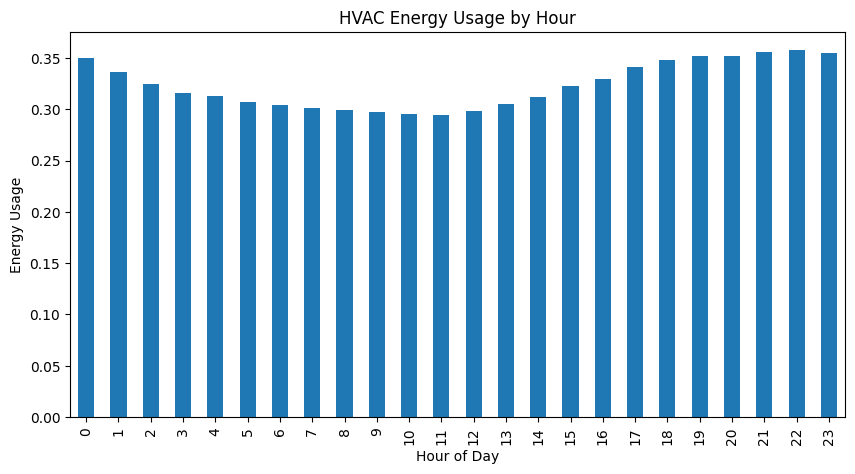

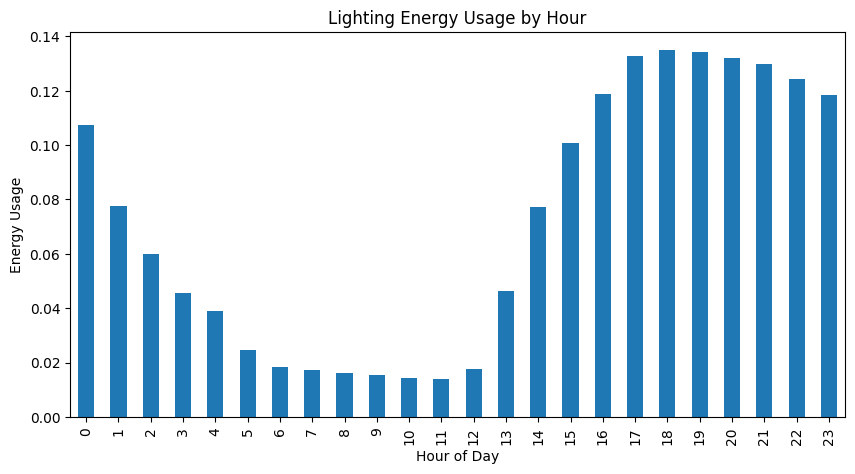

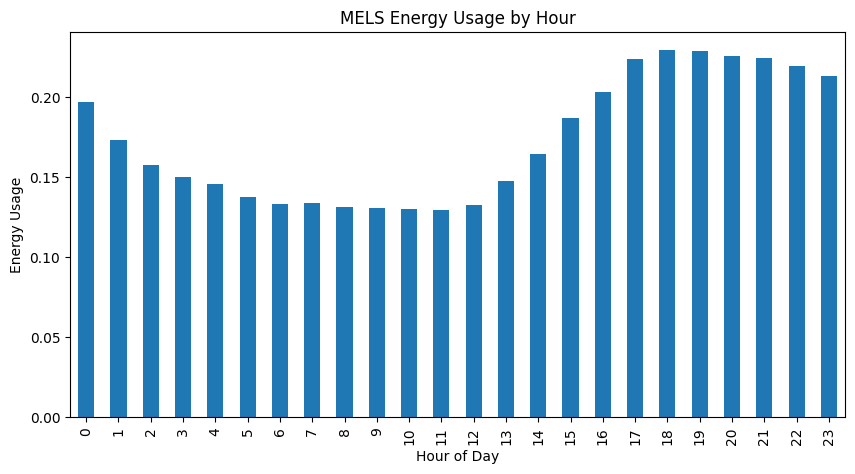

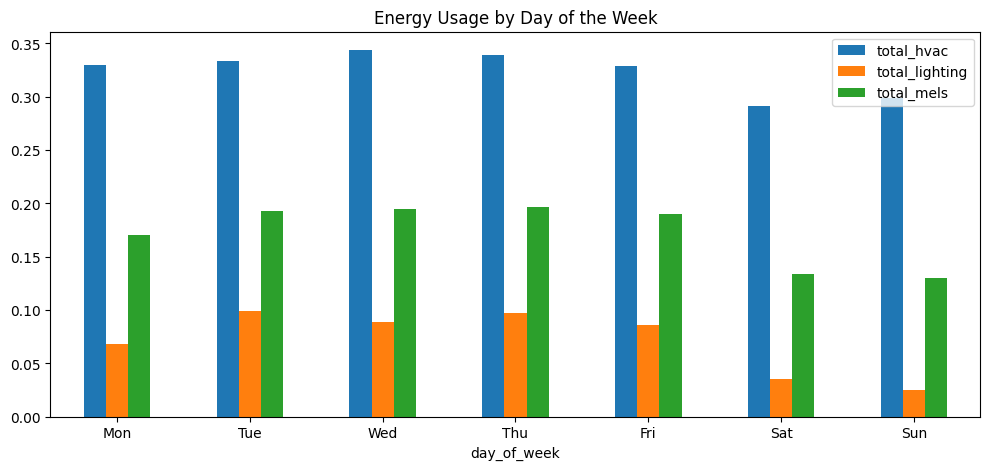

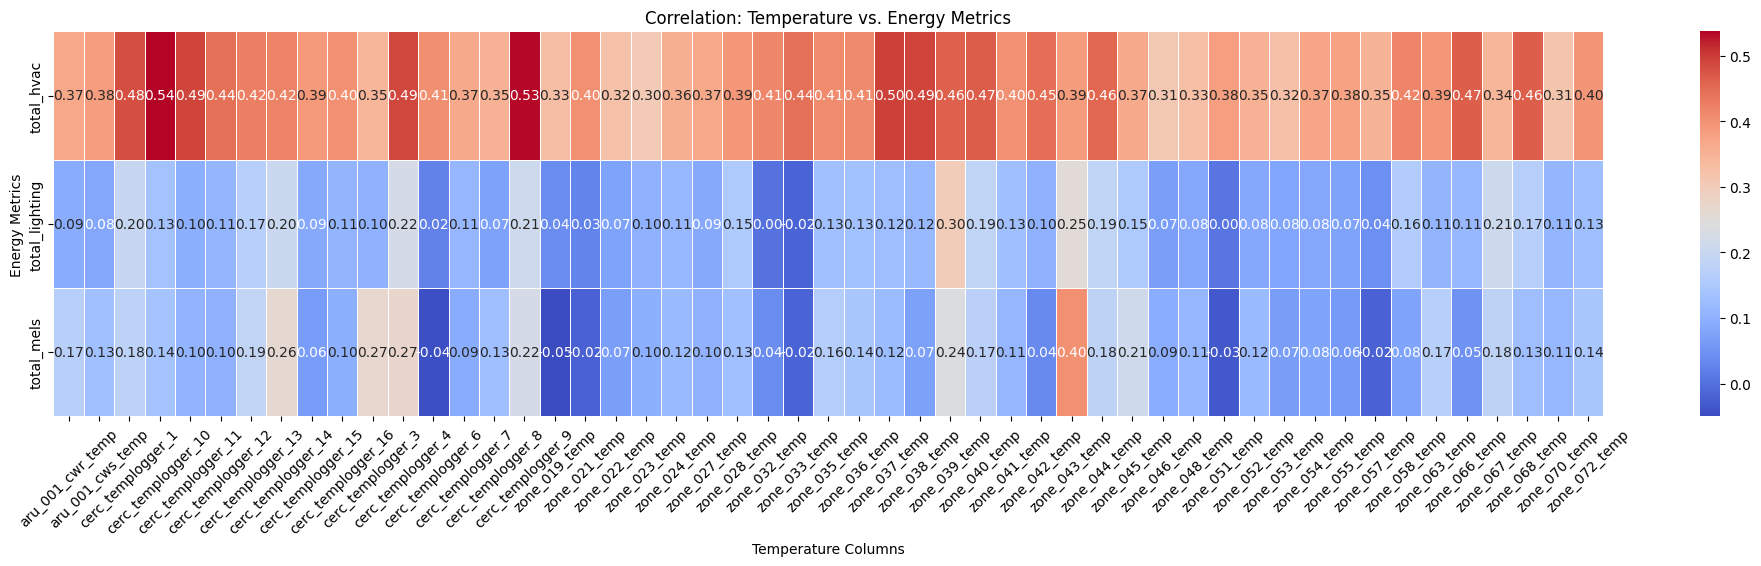

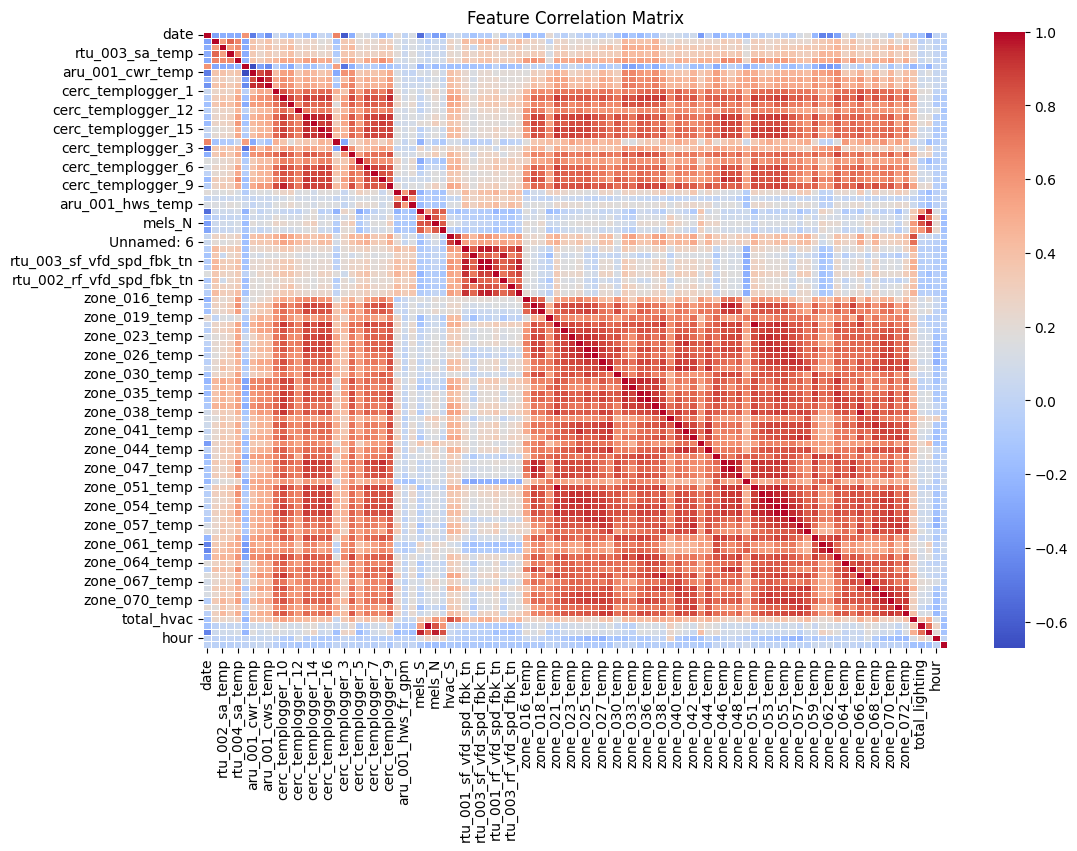

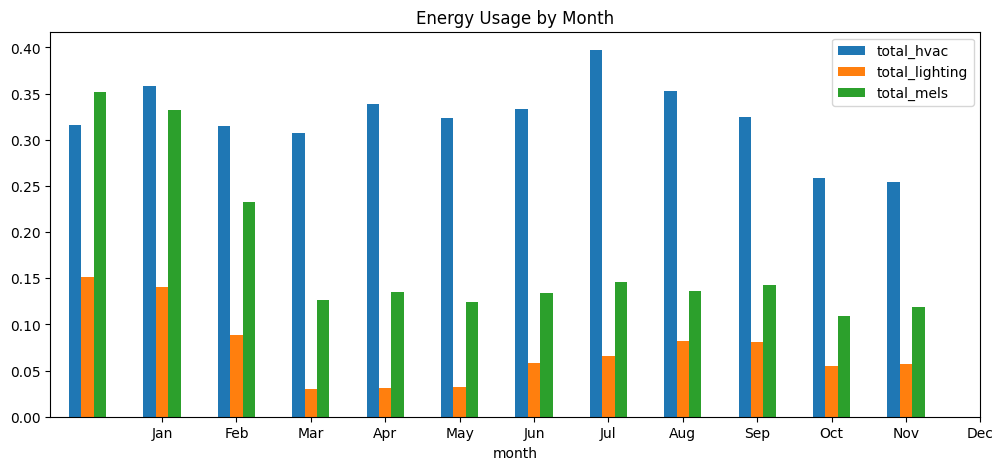

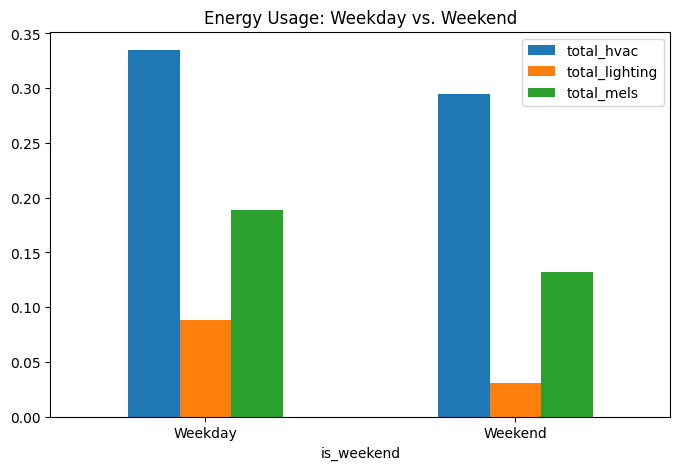

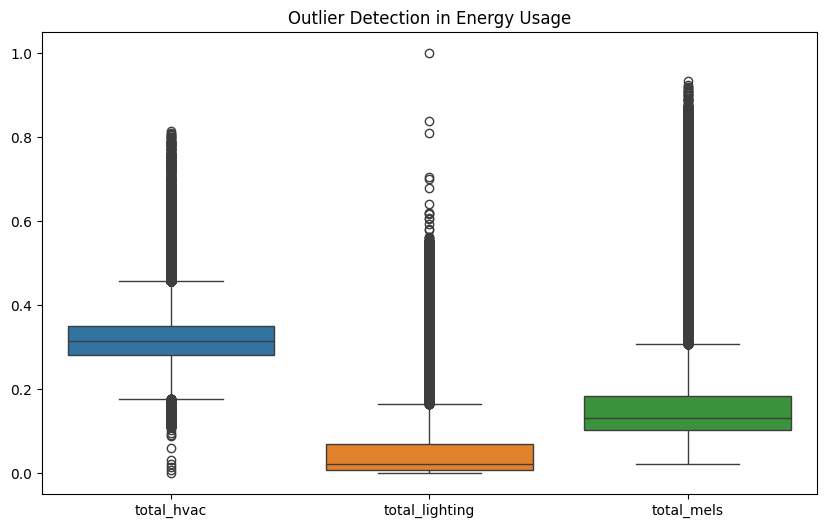

In [11]:
# Do Statistical analysis on trends and peak times before AI forecasting

# Define different energy categories
y_hvac = (merged_df["hvac_N"] + merged_df["hvac_S"]) / 2  # HVAC Energy (Averaged)
y_lighting = merged_df["lig_S"]  # Lighting Energy (Single Source)
y_mels = (merged_df["mels_N"] + merged_df["mels_S"]) / 2  # Miscellaneous Load (Averaged)

# Add them back to the dataset
merged_df["total_hvac"] = y_hvac
merged_df["total_lighting"] = y_lighting
merged_df["total_mels"] = y_mels
merged_df["hour"] = merged_df["date"].dt.hour

# HVAC Energy Usage by Hour
hvac_hourly = merged_df.groupby("hour")["total_hvac"].mean()
plt.figure(figsize=(10, 5))
hvac_hourly.plot(kind="bar", title="HVAC Energy Usage by Hour")
plt.ylabel("Energy Usage")
plt.xlabel("Hour of Day")
plt.show()

# Lighting Energy Usage by Hour
lighting_hourly = merged_df.groupby("hour")["total_lighting"].mean()
plt.figure(figsize=(10, 5))
lighting_hourly.plot(kind="bar", title="Lighting Energy Usage by Hour")
plt.ylabel("Energy Usage")
plt.xlabel("Hour of Day")
plt.show()

# MELS Energy Usage by Hour
mels_hourly = merged_df.groupby("hour")["total_mels"].mean()
plt.figure(figsize=(10, 5))
mels_hourly.plot(kind="bar", title="MELS Energy Usage by Hour")
plt.ylabel("Energy Usage")
plt.xlabel("Hour of Day")
plt.show()

# Extract day of the week and compute averages and trends
merged_df["day_of_week"] = merged_df["date"].dt.dayofweek

# Compute weekly average
weekly_usage = merged_df.groupby("day_of_week")[["total_hvac", "total_lighting", "total_mels"]].mean()

# Plot weekly trends
weekly_usage.plot(kind="bar", figsize=(12, 5), title="Energy Usage by Day of the Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], rotation=0)
plt.show()

# Correlation between temperature & HVAC, lighting and miscilanious energy usage
energy_metrics = ["total_hvac", "total_lighting", "total_mels"]
temp_cols = [col for col in merged_df.columns if "temp" in col]
corr_matrix = merged_df[temp_cols + energy_metrics].corr()

threshold = 0.3 # threshold correlation
filtered_corr = corr_matrix.loc[energy_metrics, temp_cols]
significant_temp_cols = filtered_corr.columns[(filtered_corr.abs() > threshold).any()]
filtered_corr = filtered_corr[significant_temp_cols]

plt.figure(figsize=(25, 5))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation: Temperature vs. Energy Metrics")
plt.xlabel("Temperature Columns")
plt.ylabel("Energy Metrics")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Compute correlation matrix
correlation_matrix = merged_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

# Compute monthly and weekday vs. weekend trends
merged_df["month"] = merged_df["date"].dt.month
monthly_usage = merged_df.groupby("month")[["total_hvac", "total_lighting", "total_mels"]].mean()

monthly_usage.plot(kind="bar", figsize=(12, 5), title="Energy Usage by Month")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)
plt.show()

merged_df["is_weekend"] = merged_df["day_of_week"].apply(lambda x: 1 if x >= 5 else 0)
weekend_usage = merged_df.groupby("is_weekend")[["total_hvac", "total_lighting", "total_mels"]].mean()

weekend_usage.plot(kind="bar", figsize=(8, 5), title="Energy Usage: Weekday vs. Weekend", legend=True)
plt.xticks(ticks=[0, 1], labels=["Weekday", "Weekend"], rotation=0)
plt.show()

# Compute boxplots for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[["total_hvac", "total_lighting", "total_mels"]])
plt.title("Outlier Detection in Energy Usage")
plt.show()

<ipython-input-12-c97dee4f863a>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df["day"] = merged_df["date"].dt.date


Min and Max values of normalized energy_scaled:
Min: 0.0
Max: 1.0


<ipython-input-12-c97dee4f863a>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df["usage_cluster"] = kmeans.fit_predict(energy_scaled)


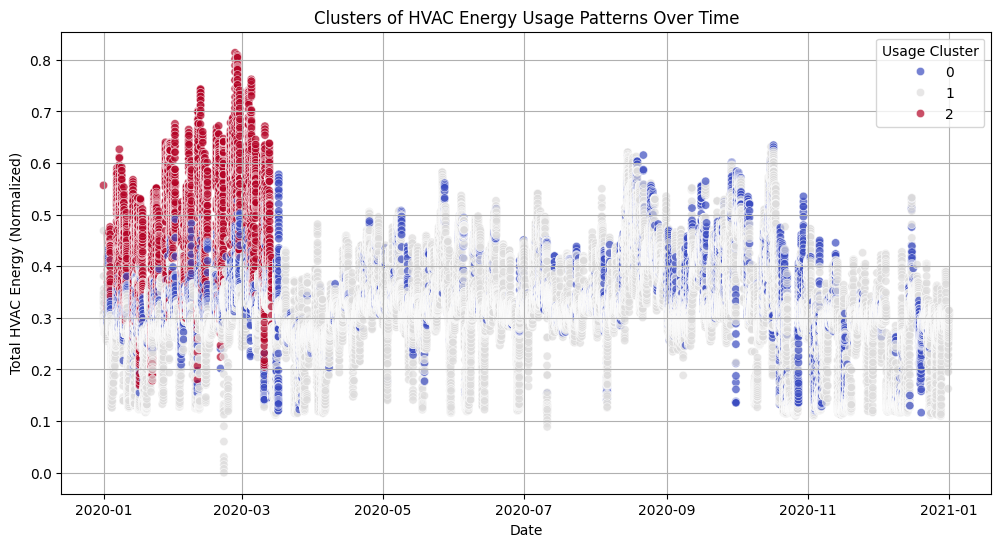

<Figure size 1200x500 with 0 Axes>

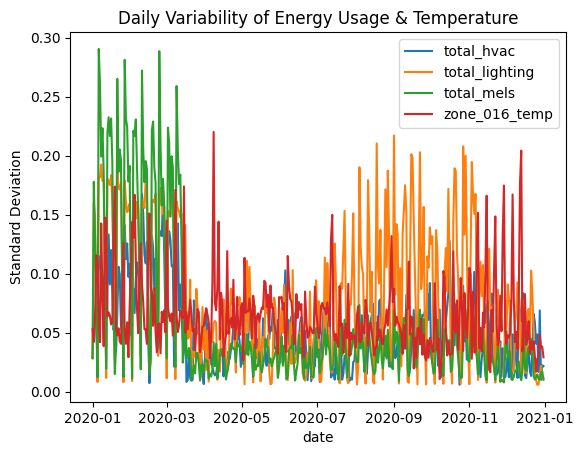

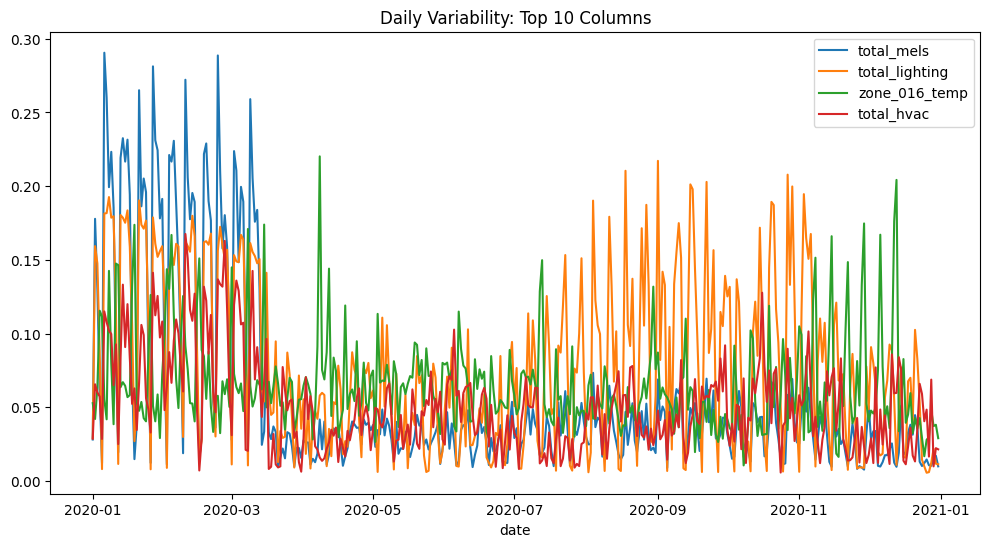

<ipython-input-12-c97dee4f863a>:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df["temp_change"] = merged_df["zone_016_temp"].diff()


Correlation between HVAC Usage & Temperature Change:
             temp_change  total_hvac
temp_change     1.000000   -0.011447
total_hvac     -0.011447    1.000000


<Figure size 1200x500 with 0 Axes>

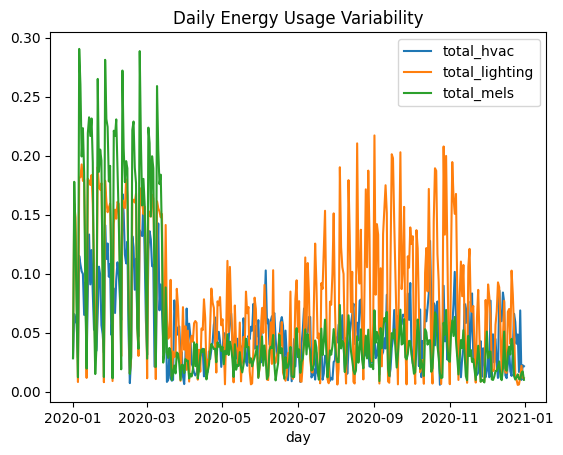

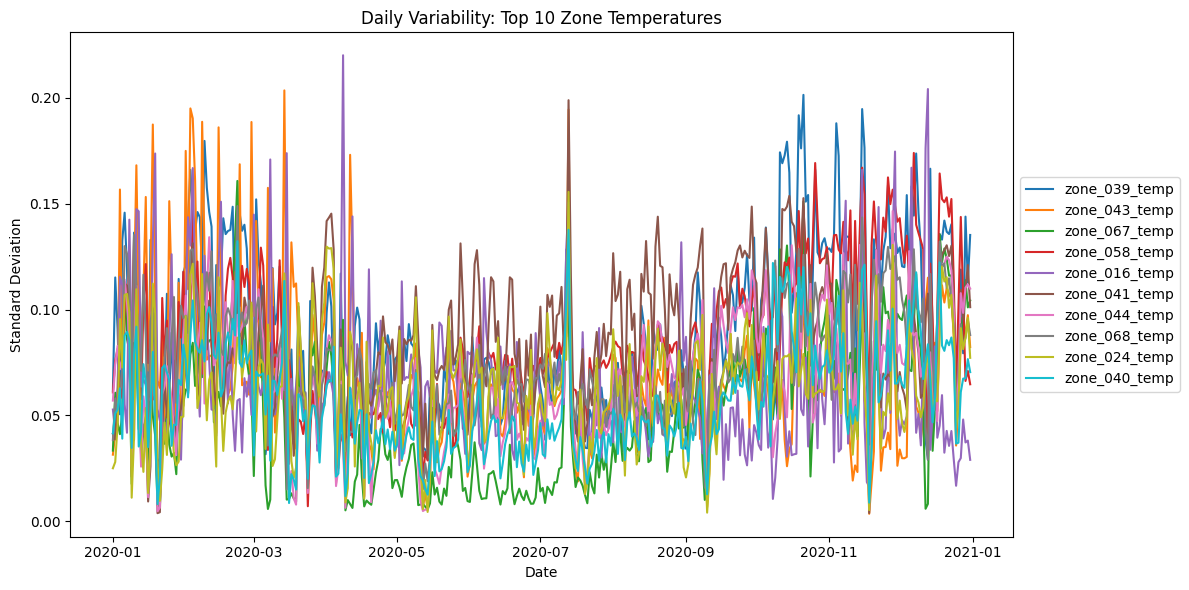

<Figure size 1200x500 with 0 Axes>

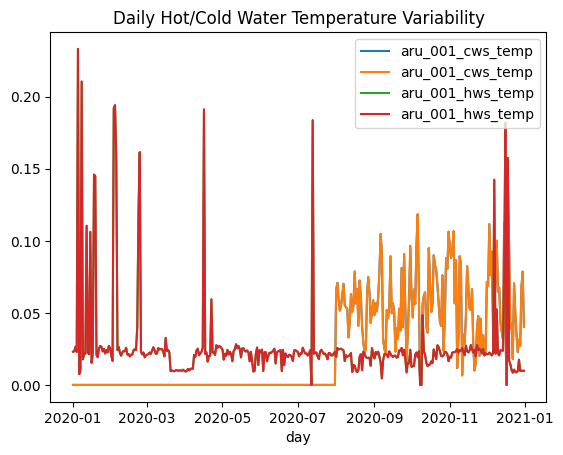

In [12]:
# Do analysis on the varibility of the data for insights on the utility of AI
merged_df["date"] = pd.to_datetime(merged_df["date"])

# Extract time components
merged_df["hour"] = merged_df["date"].dt.hour
merged_df["day"] = merged_df["date"].dt.date
merged_df["day_of_week"] = merged_df["date"].dt.dayofweek
merged_df["month"] = merged_df["date"].dt.month

# Define energy-related columns
energy_cols = ["total_hvac", "total_lighting", "total_mels"]
energy_scaled = merged_df[energy_cols].values

print("Min and Max values of normalized energy_scaled:")
print("Min:", energy_scaled.min())
print("Max:", energy_scaled.max())

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
merged_df["usage_cluster"] = kmeans.fit_predict(energy_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=merged_df,
    x="date",
    y="total_hvac",
    hue="usage_cluster",
    palette="coolwarm",
    alpha=0.7
)
plt.title("Clusters of HVAC Energy Usage Patterns Over Time")
plt.xlabel("Date")
plt.ylabel("Total HVAC Energy (Normalized)")
plt.legend(title="Usage Cluster", loc="upper right")
plt.grid(True)
plt.show()


# Plot the daily variability
daily_variability = merged_df.groupby(merged_df["date"].dt.date)[["total_hvac", "total_lighting", "total_mels", "zone_016_temp"]].std()
plt.figure(figsize=(12, 5))
daily_variability.plot(title="Daily Variability of Energy Usage & Temperature")
plt.ylabel("Standard Deviation")
plt.show()

# Visualize the top 10 collumns with the highest varibility
top_columns = daily_variability.std().nlargest(10).index
daily_variability[top_columns].plot(title="Daily Variability: Top 10 Columns", figsize=(12, 6))
plt.show()

# Compute difference in temperature over time and correlation with total hvac and print
merged_df["temp_change"] = merged_df["zone_016_temp"].diff()

hvac_temp_corr = merged_df[["temp_change", "total_hvac"]].corr()
print("Correlation between HVAC Usage & Temperature Change:")
print(hvac_temp_corr)

# Plot the variability for the energy categories
temp_cols = [col for col in merged_df.columns if "temp" in col.lower()]
fan_speed_cols = [col for col in merged_df.columns if "fan_spd" in col.lower()]
water_temp_cols = [col for col in merged_df.columns if "hws_temp" in col.lower() or "cws_temp" in col.lower()]

daily_variability = merged_df.groupby("day")[energy_cols + temp_cols + fan_speed_cols + water_temp_cols].std()

plt.figure(figsize=(12, 5))
daily_variability[energy_cols].plot(title="Daily Energy Usage Variability")
plt.show()

# Filter specific categories for separate plots
zone_temps = [col for col in daily_variability.columns if "zone_" in col]
rtu_temps = [col for col in daily_variability.columns if "rtu_" in col]

zone_temp_cols = [col for col in daily_variability.columns if "zone_" in col]

zone_temp_variability = daily_variability[zone_temp_cols].std()

top_10_zone_temps = zone_temp_variability.nlargest(10).index

# Plot the top 10 zone temperature columns
daily_variability[top_10_zone_temps].plot(title="Daily Variability: Top 10 Zone Temperatures", figsize=(12, 6))
plt.ylabel("Standard Deviation")
plt.xlabel("Date")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)  # Move legend outside
plt.tight_layout()
plt.show()

# Plot the variability of the water temperature
plt.figure(figsize=(12, 5))
daily_variability[water_temp_cols].plot(title="Daily Hot/Cold Water Temperature Variability")
plt.show()




In [13]:
# Prepare data split for TPU training

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # detect
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("All TPU devices: ", tf.config.list_logical_devices('TPU'))
except ValueError:
    # Fallback to CPU or GPU if TPU not found
    strategy = tf.distribute.get_strategy()


time_steps = 8
with strategy.scope():
    model = Sequential([
        LSTM(32, activation="relu", return_sequences=True, input_shape=(time_steps, 3)),
        LSTM(16, activation="relu"),
        Dense(3)  # Predict total_hvac, total_lighting, total_mels
    ])
    model.compile(optimizer="adam", loss="mae")

# Load and Preprocess Data
merged_df["date"] = pd.to_datetime(merged_df["date"])

# Select First 3 Months Before COVID
df_3m = merged_df[(merged_df["date"] >= "2020-01-01") & (merged_df["date"] < "2020-04-01")].copy()

# Reduce Dataset Size to Prevent RAM Overflow
#df_3m = df_3m.sample(n=50000, random_state=42)  # Use only 50K rows

# Feature Engineering
df_3m["hour"] = df_3m["date"].dt.hour  # Hour of the day
df_3m["day_of_week"] = df_3m["date"].dt.dayofweek  # Monday=0, Sunday=6

# Define LSTM Time Steps
# Use past 8 hours to predict the next hour

# Convert Data to Numpy Arrays for Training
data = df_3m[["total_hvac", "total_lighting", "total_mels"]].values

X = np.array([data[i:i+time_steps] for i in range(0, len(data) - time_steps)])
y = np.array([data[i+time_steps] for i in range(0, len(data) - time_steps)])

print(f"Optimized Training Data Shape: X={X.shape}, y={y.shape}")

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert Data to Efficient TensorFlow Dataset
BATCH_SIZE = 32  # TPU prefers large batches
BUFFER_SIZE = 10000

train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_data = test_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

def prepare_tpu_dataset(X, y, batch_size=32, buffer_size=10000):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

train_data = prepare_tpu_dataset(X_train, y_train)
test_data = prepare_tpu_dataset(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Optimized Training Data Shape: X=(27654, 8, 3), y=(27654, 3)


In [14]:
# Train model for predicting hourly energy usage using a TPU
model.fit(train_data, epochs=5, validation_data=test_data, verbose=1)

# Save model
model.save("hourly_energy_prediction.keras")  # or .pb, or a folder with tf.saved_model

# Save to drive for reuse
drive.mount('/content/drive')

MODEL_PATH = "/content/drive/MyDrive/connect_models/"

# Ensure the directory exists
os.makedirs(MODEL_PATH, exist_ok=True)

# Save the trained model
model.save(f"{MODEL_PATH}hourly_energy_prediction.keras")

print(f"Model saved to {MODEL_PATH}hourly_energy_prediction.keras")

print("Model Trained and saved!")

Epoch 1/5
692/692 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0851 - val_loss: 0.0198
Epoch 2/5
692/692 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0197 - val_loss: 0.0166
Epoch 3/5
692/692 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0172 - val_loss: 0.0165
Epoch 4/5
692/692 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0160 - val_loss: 0.0154
Epoch 5/5
692/692 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0150 - val_loss: 0.0144
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to /content/drive/MyDrive/connect_models/hourly_energy_prediction.keras
Model Trained and saved!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading model from /content/hourly_energy_prediction.keras
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Model Evaluated!
Normalized MAE - HVAC: 0.01
Normalized MAE - Lighting: 0.01
Normalized MAE - MELS: 0.02

Unnormalized MAE - HVAC: 0.01 kWh
Unnormalized MAE - Lighting: 0.01 kWh
Unnormalized MAE - MELS: 0.02 kWh


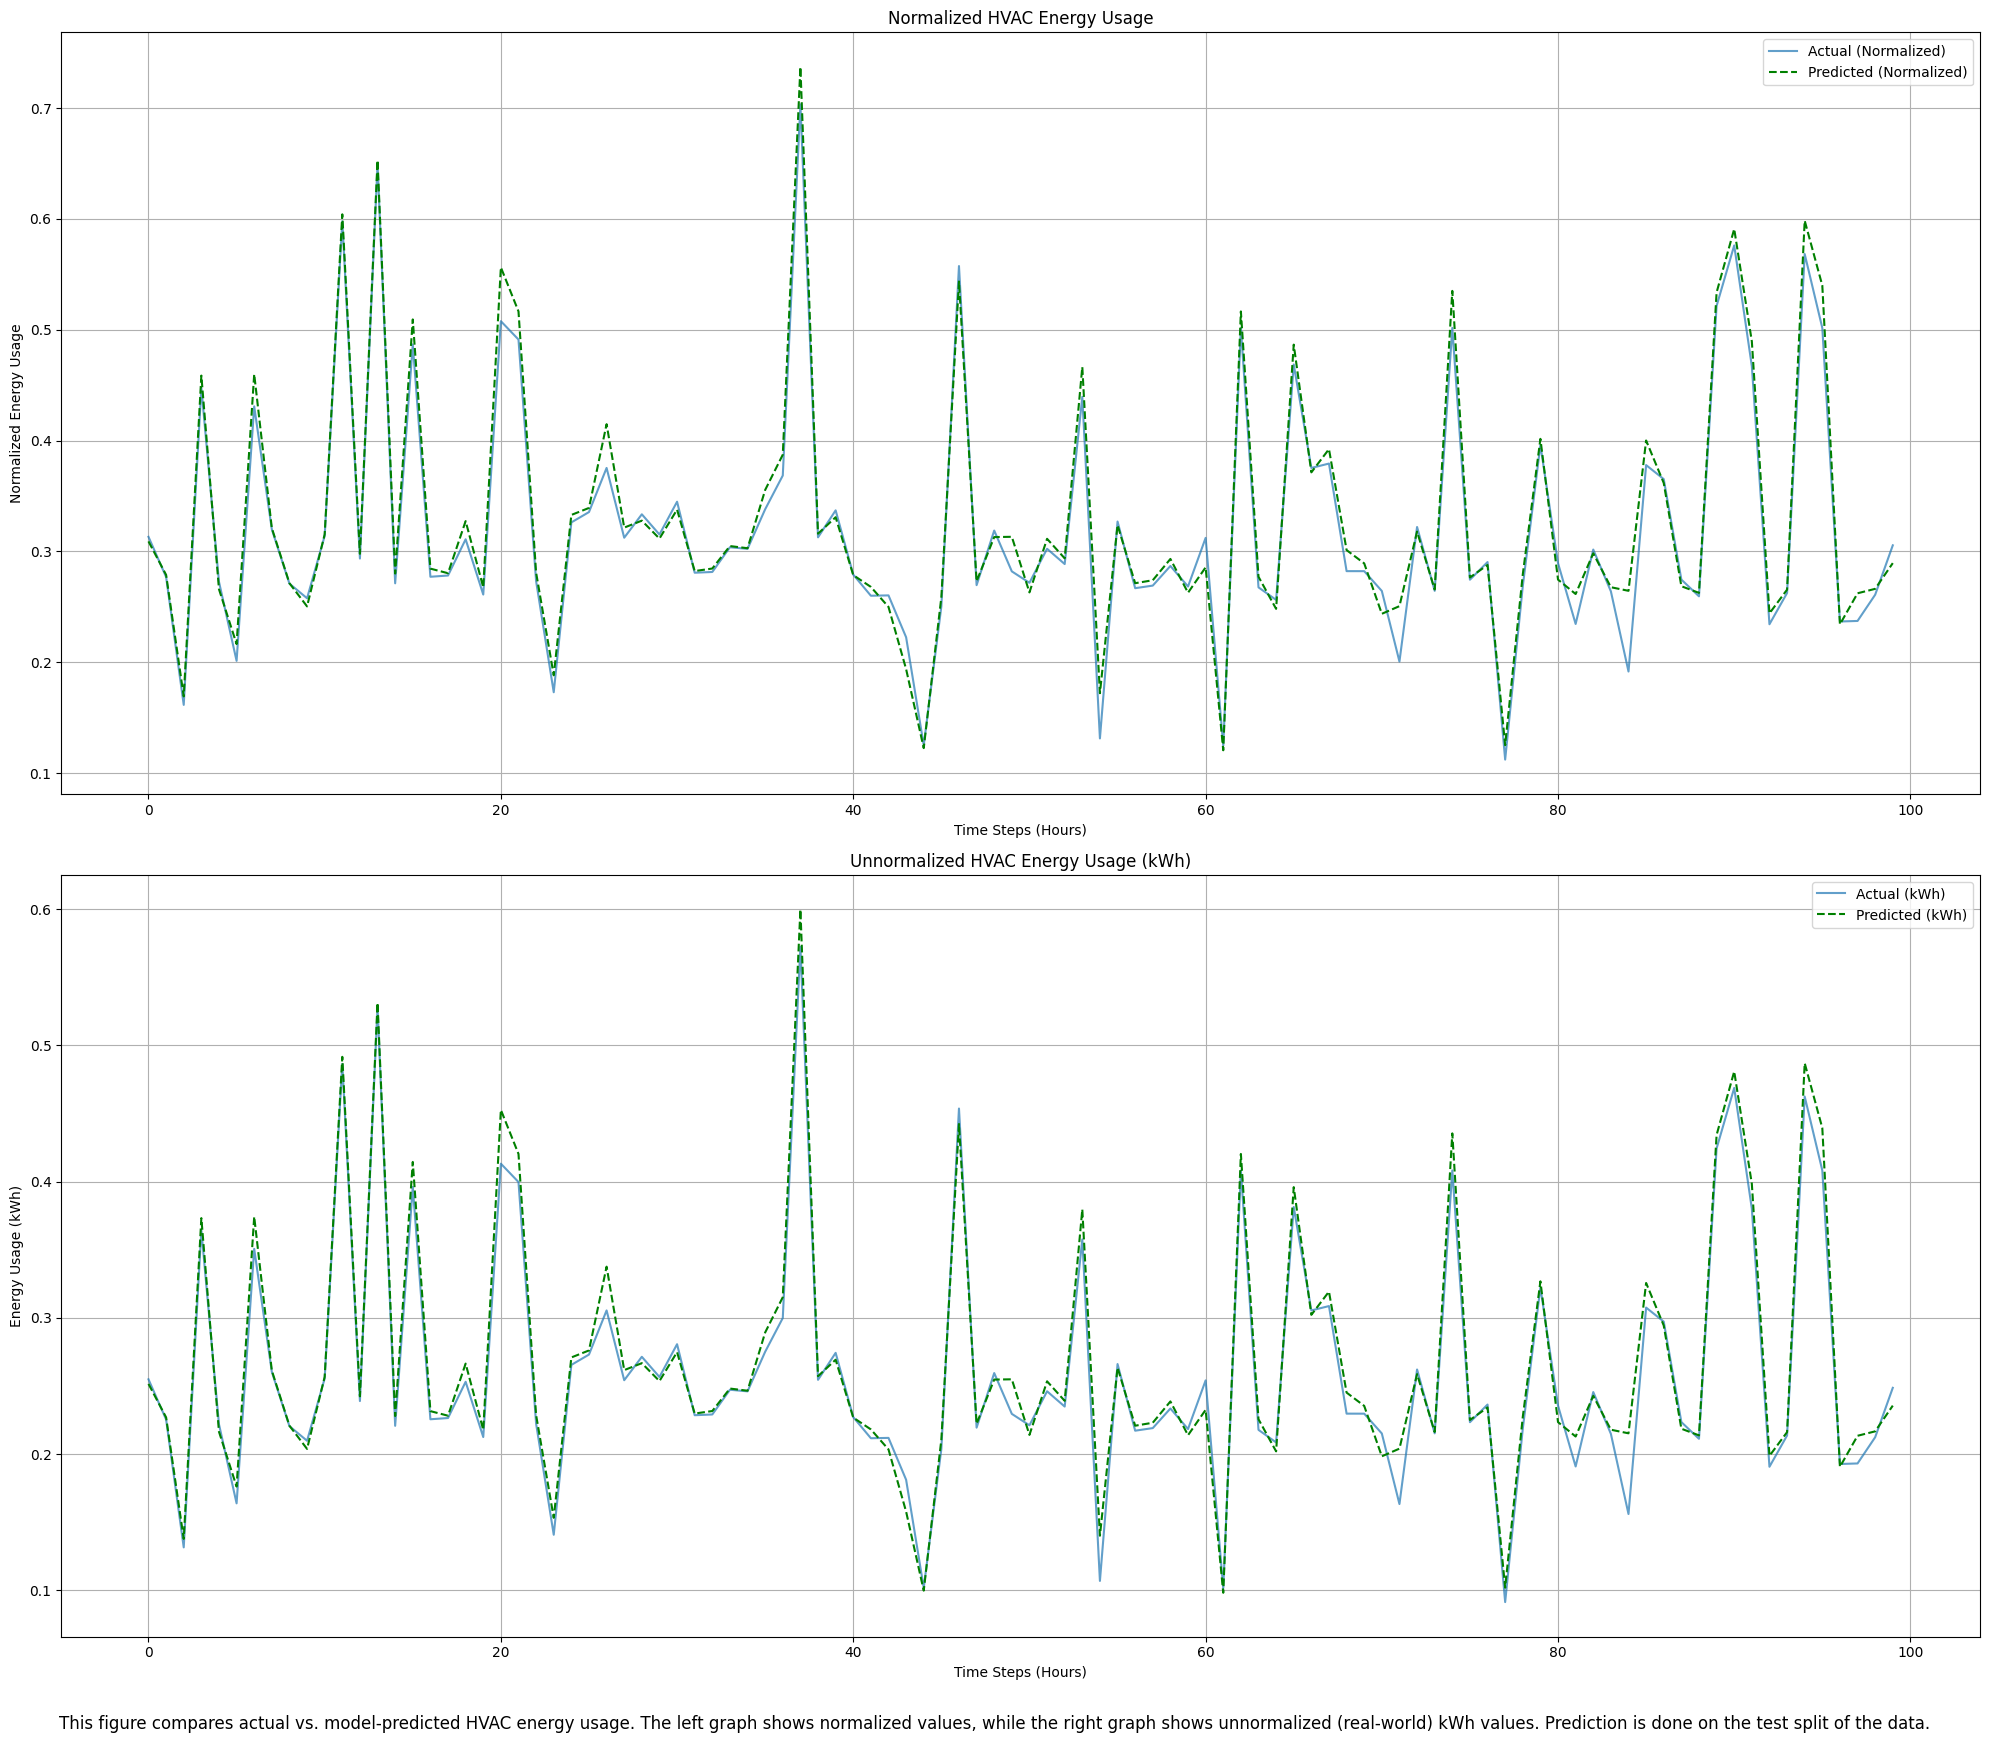

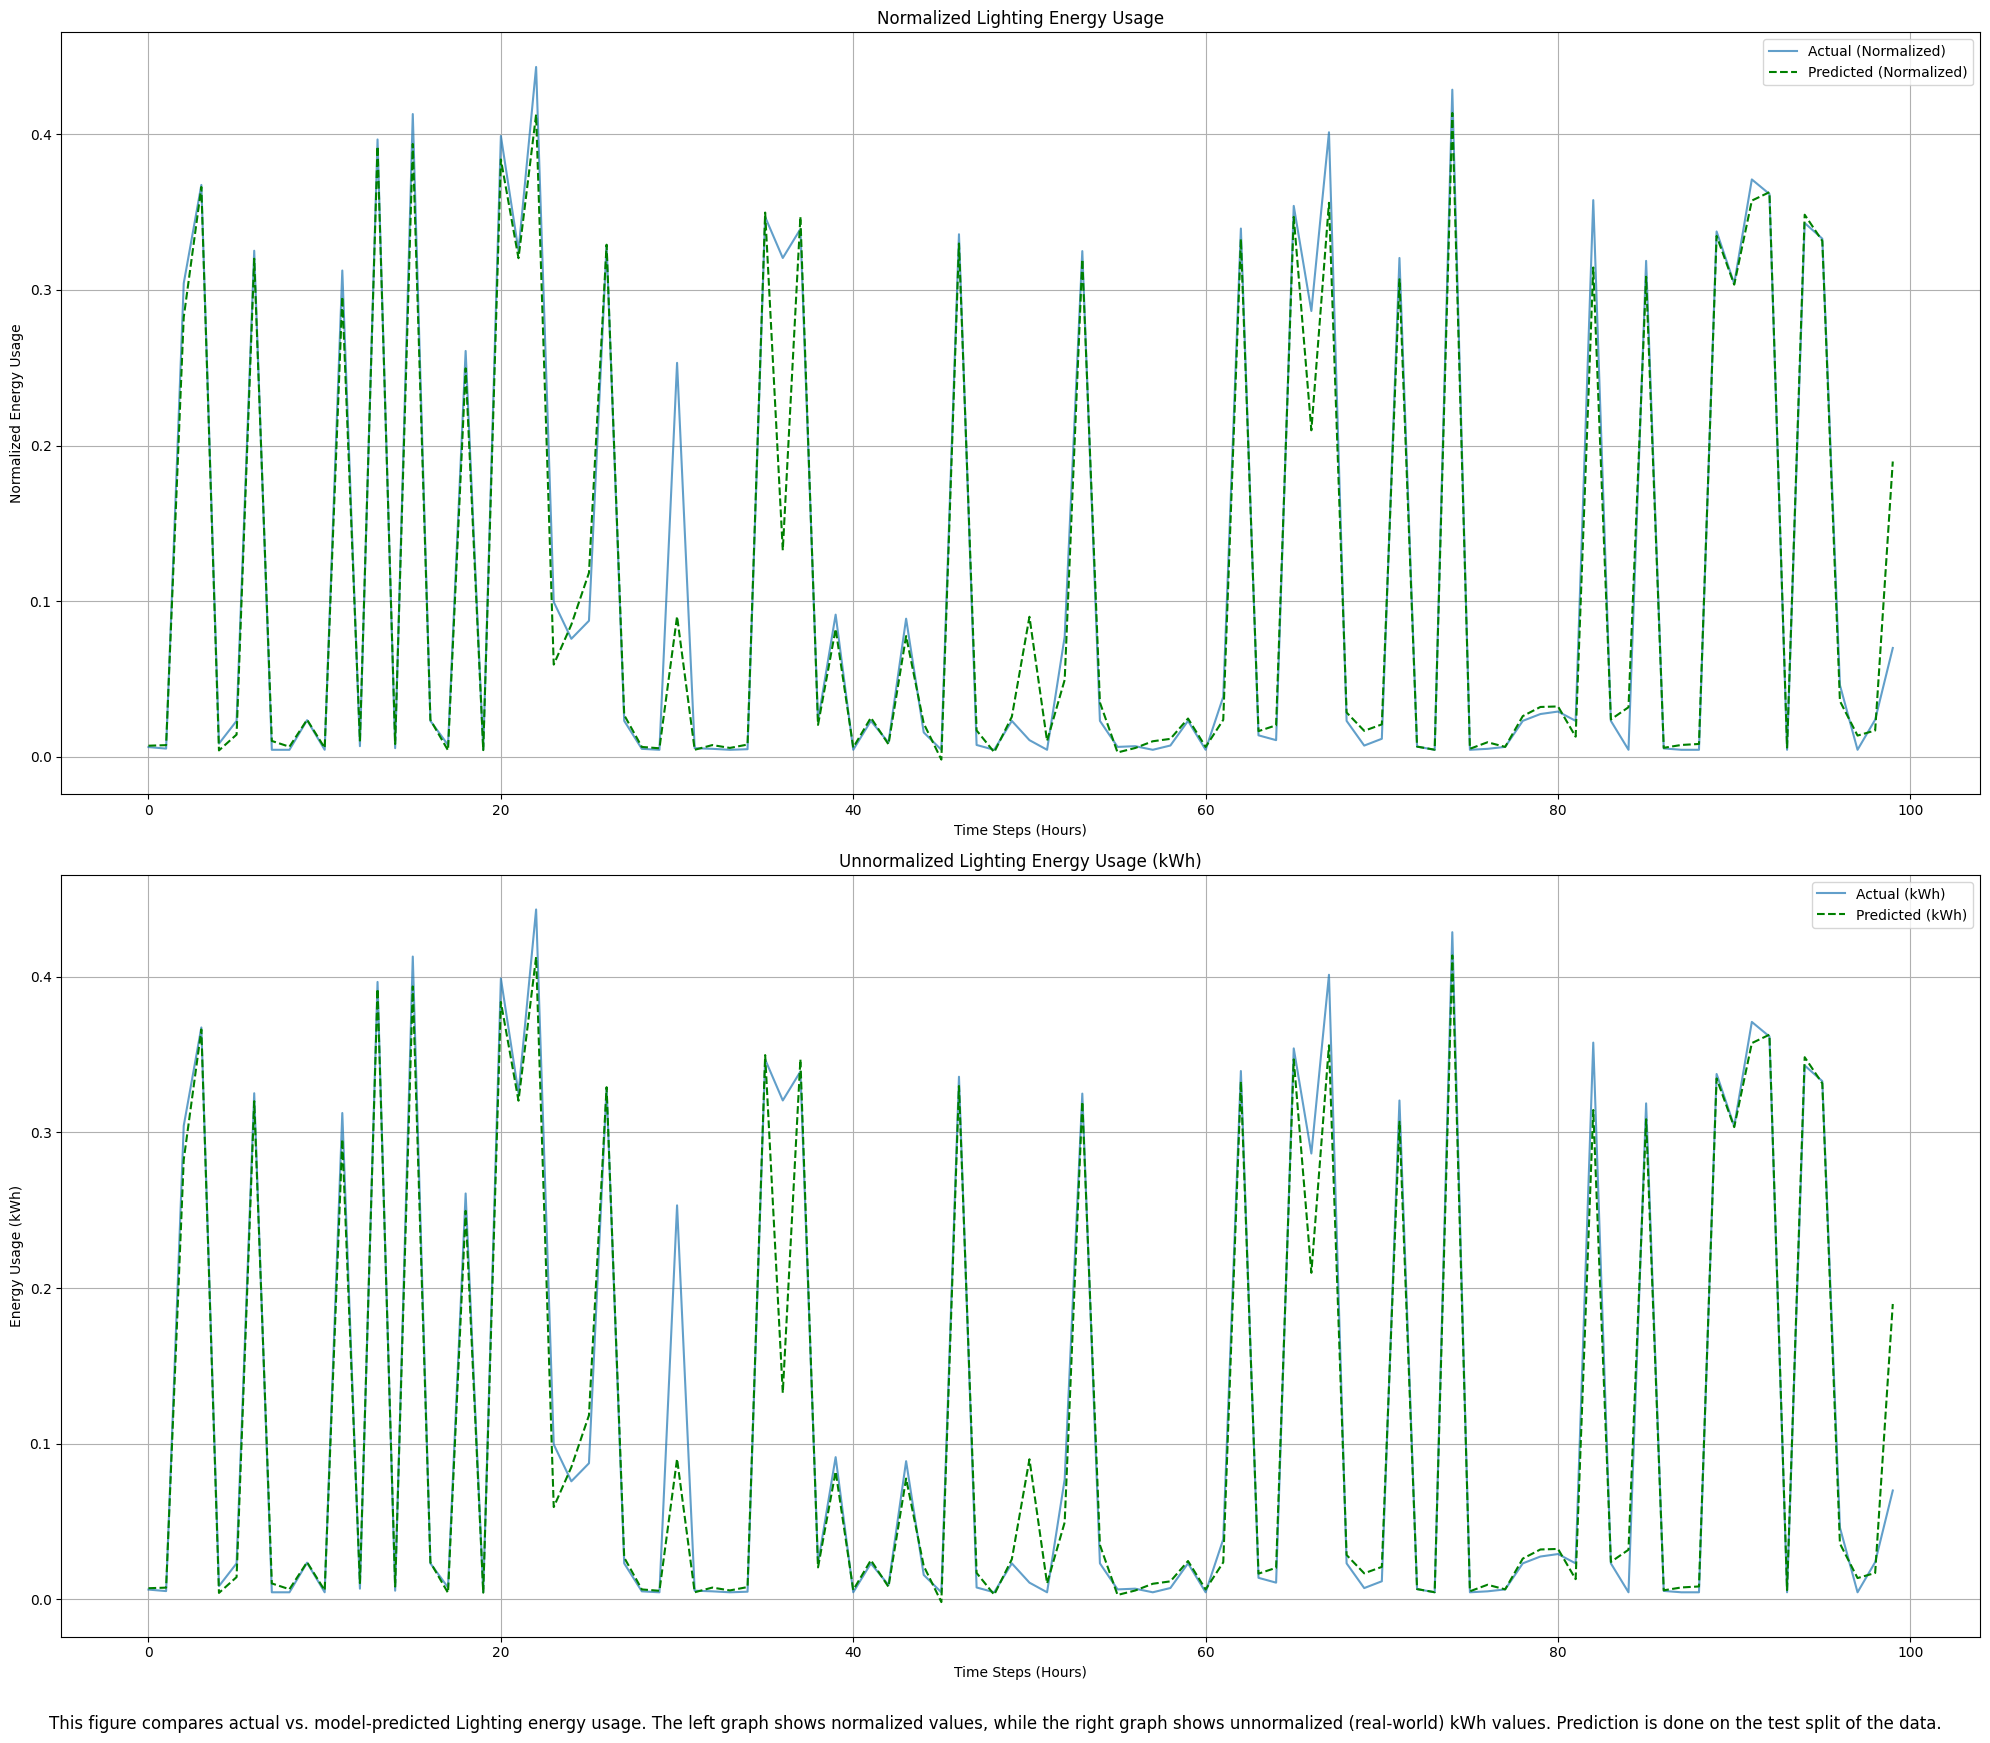

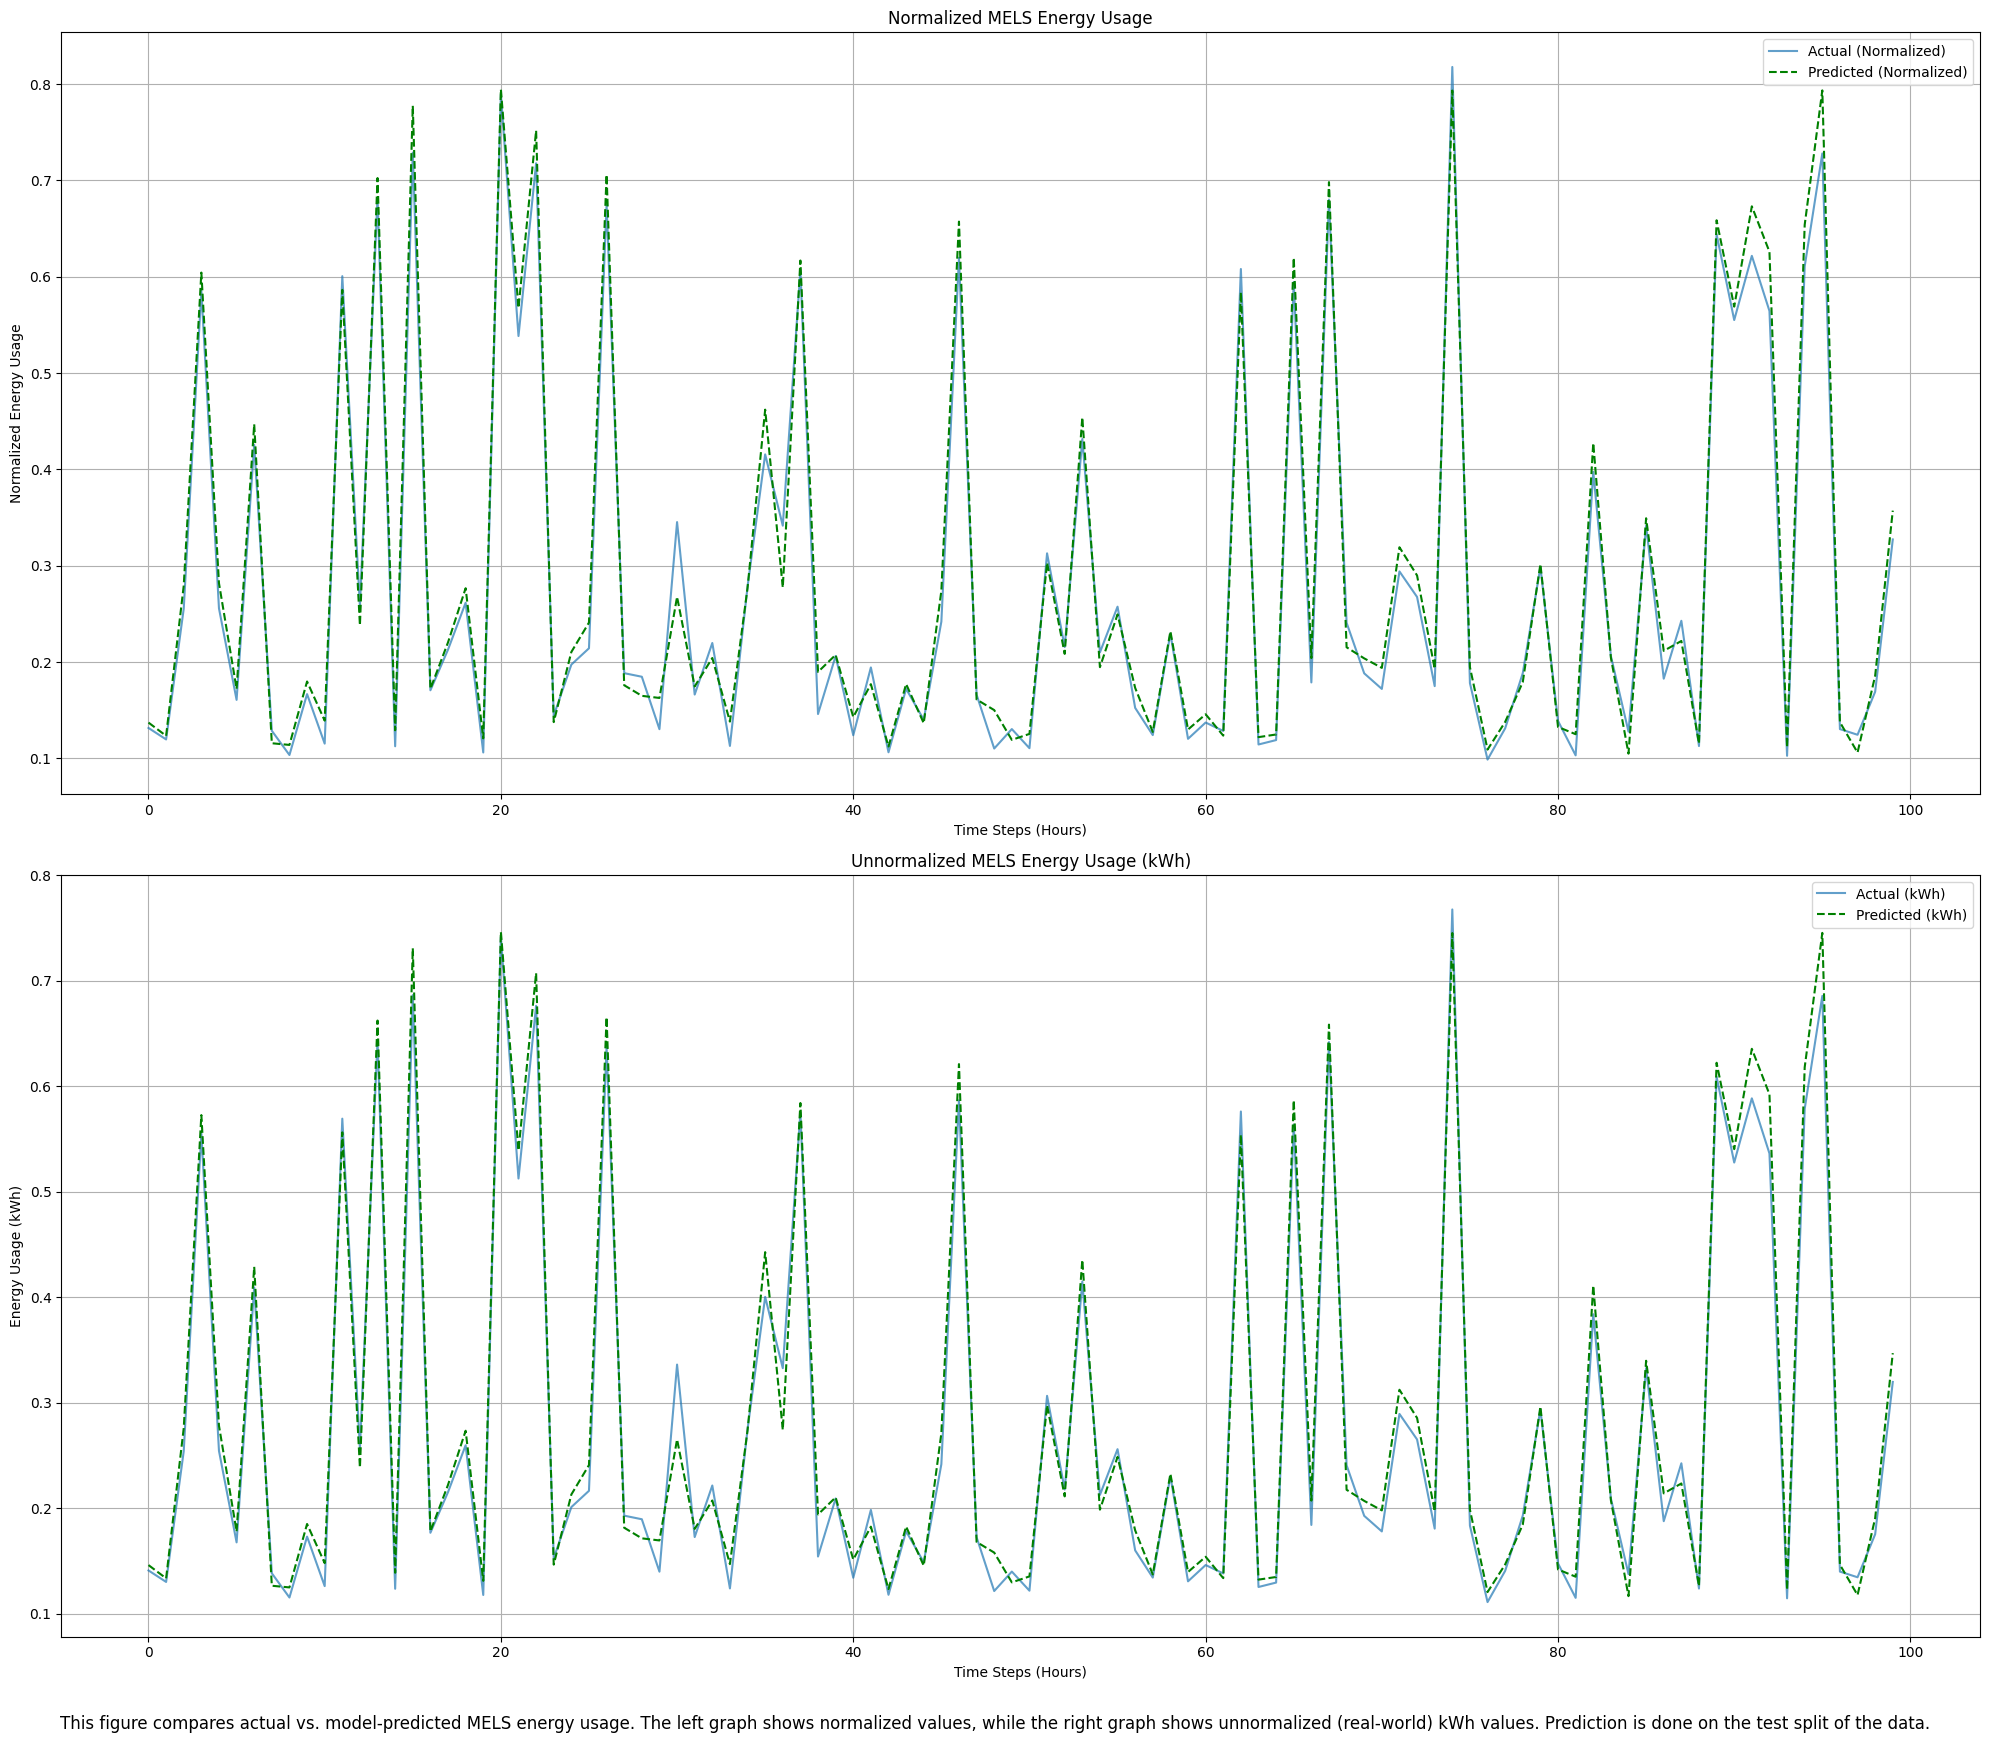

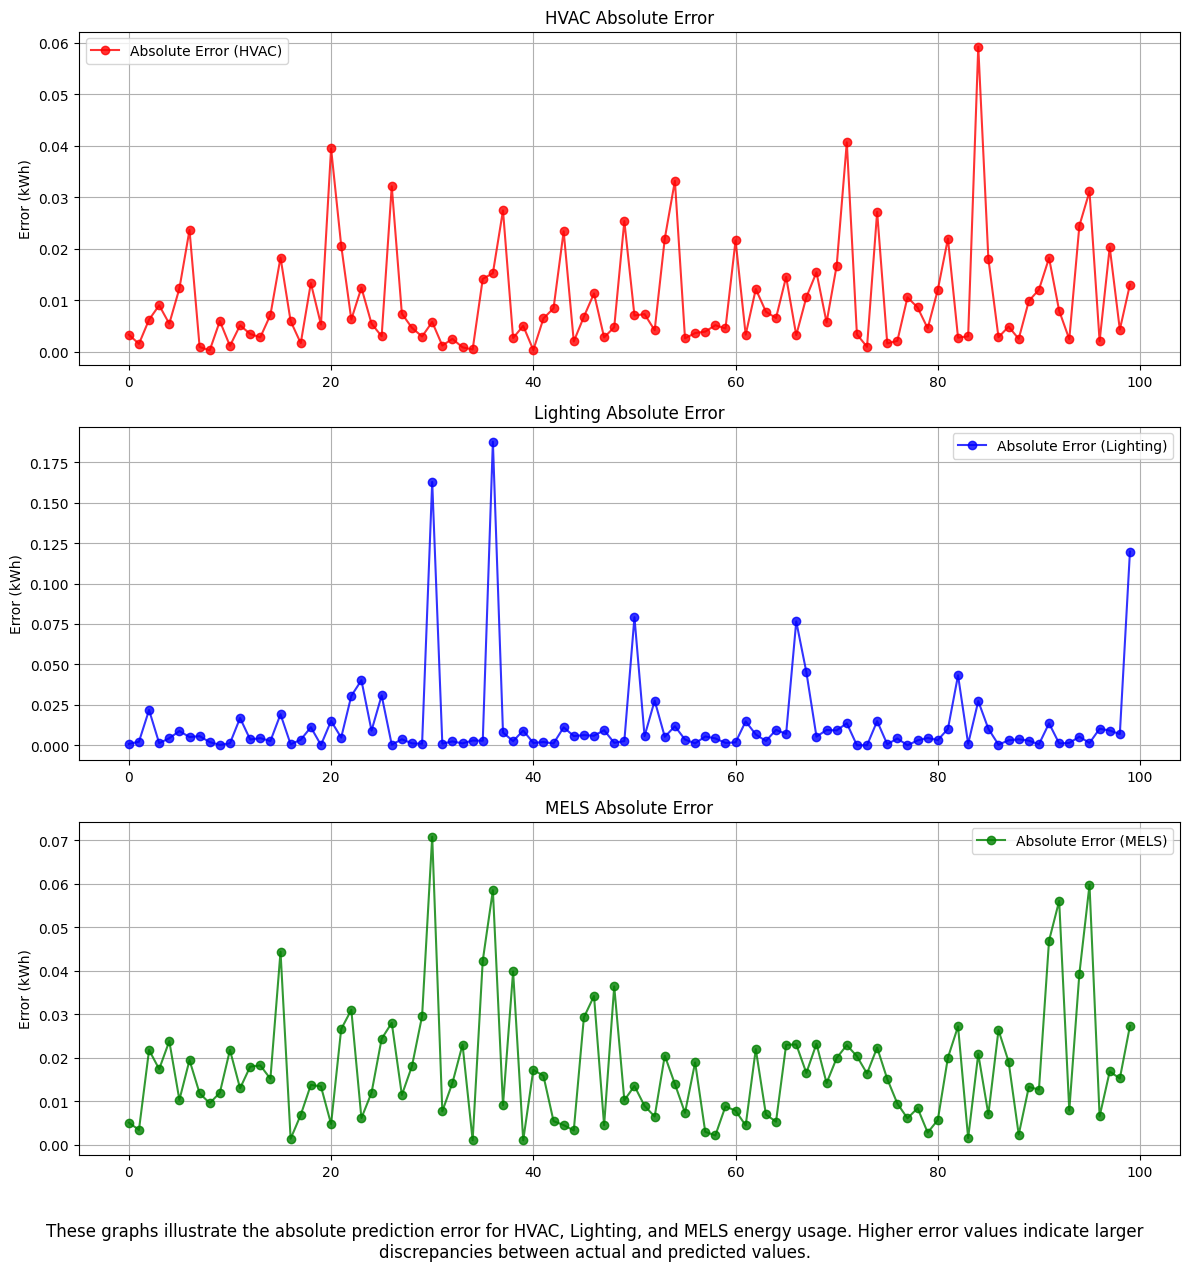

<Figure size 1200x500 with 0 Axes>

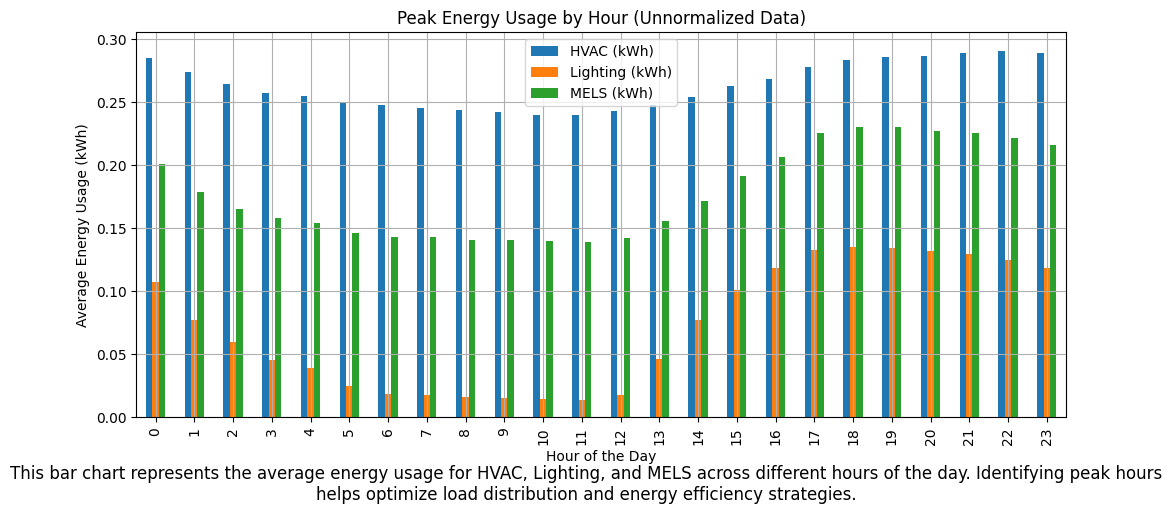

Successfully extracted and unnormalized 24 hourly HVAC data points for 2020-01-15
Total Cost Before Load Shifting: 1.55
Total Cost After Load Shifting: 1.40
Total Savings: 0.15 (9.46% reduction)


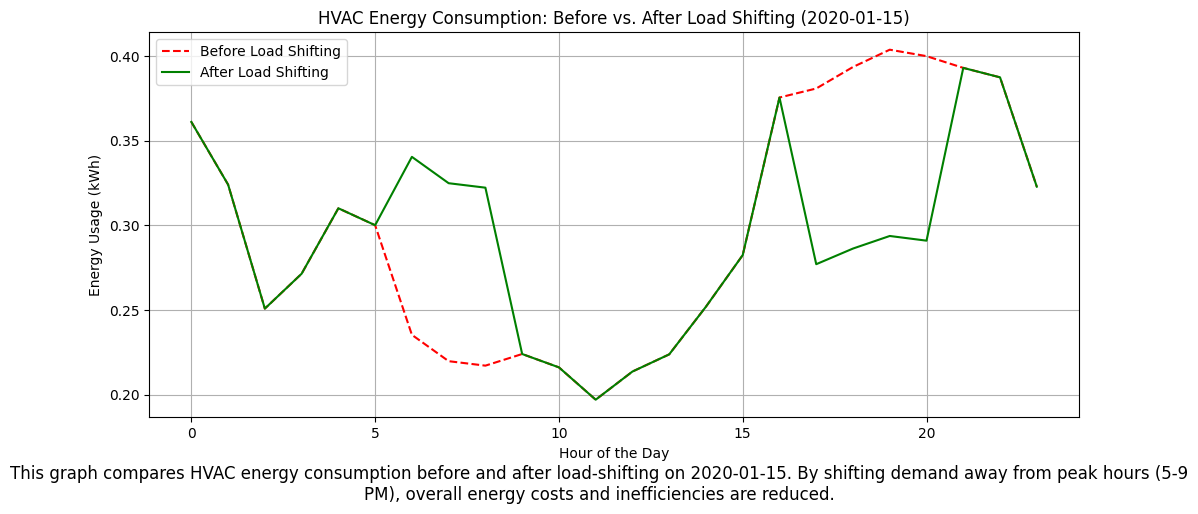

In [17]:
# Predict & evaluate the model

# Define paths
SCALAR_PATH = "/content/drive/MyDrive/scalars/"
LOCAL_MODEL_PATH = "/content/hourly_energy_prediction.keras"
DRIVE_MODEL_PATH = "/content/drive/MyDrive/connect_models/hourly_energy_prediction.keras"

# Mount Google Drive
drive.mount('/content/drive')

# Check if the model exists in /content/ first, else load from Google Drive
if os.path.exists(LOCAL_MODEL_PATH):
    print(f"Loading model from {LOCAL_MODEL_PATH}")
    model = load_model(LOCAL_MODEL_PATH)
else:
    print(f"Model not found in {LOCAL_MODEL_PATH}, loading from Google Drive...")
    model = load_model(DRIVE_MODEL_PATH)

# Mount Google Drive and Load the MinMaxScaler
scaler_features = joblib.load(f"{SCALAR_PATH}scaler_features.pkl")
scaler_y = joblib.load(f"{SCALAR_PATH}scaler_y.pkl")

# Load Model & Predict
y_pred = model.predict(X_test, batch_size=32)

# Inverse Transform to Get Unnormalized Values (Real kWh)
y_test_original = scaler_y.inverse_transform(y_test)
y_pred_original = scaler_y.inverse_transform(y_pred)

# Calculate MAE for Normalized and Unnormalized Data
mae_hvac_norm = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mae_lighting_norm = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mae_mels_norm = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

mae_hvac = mean_absolute_error(y_test_original[:, 0], y_pred_original[:, 0])
mae_lighting = mean_absolute_error(y_test_original[:, 1], y_pred_original[:, 1])
mae_mels = mean_absolute_error(y_test_original[:, 2], y_pred_original[:, 2])

# Print MAE Results
print("Model Evaluated!")
print(f"Normalized MAE - HVAC: {mae_hvac_norm:.2f}")
print(f"Normalized MAE - Lighting: {mae_lighting_norm:.2f}")
print(f"Normalized MAE - MELS: {mae_mels_norm:.2f}\n")

print(f"Unnormalized MAE - HVAC: {mae_hvac:.2f} kWh")
print(f"Unnormalized MAE - Lighting: {mae_lighting:.2f} kWh")
print(f"Unnormalized MAE - MELS: {mae_mels:.2f} kWh")


def plot_energy_usage_separate(y_test_norm, y_pred_norm, y_test_kwh, y_pred_kwh, category):
    """
    Plots two separate graphs:
    - One for normalized data
    - One for unnormalized data
    """
    fig, axes = plt.subplots(2, 1, figsize=(20, 17))

    # Normalized Plot
    axes[0].plot(y_test_norm[:100], label="Actual (Normalized)", alpha=0.7)
    axes[0].plot(y_pred_norm[:100], label="Predicted (Normalized)", linestyle="dashed", color = "green")
    axes[0].set_title(f"Normalized {category} Energy Usage")
    axes[0].set_xlabel("Time Steps (Hours)")
    axes[0].set_ylabel("Normalized Energy Usage")
    axes[0].legend()
    axes[0].grid(True)

    # Unnormalized Plot
    axes[1].plot(y_test_kwh[:100], label="Actual (kWh)", linestyle="solid", alpha=0.7)
    axes[1].plot(y_pred_kwh[:100], label="Predicted (kWh)", linestyle="dashed", color = "green")
    axes[1].set_title(f"Unnormalized {category} Energy Usage (kWh)")
    axes[1].set_xlabel("Time Steps (Hours)")
    axes[1].set_ylabel("Energy Usage (kWh)")
    axes[1].legend()
    axes[1].grid(True)

    plt.figtext(0.5, -0.02, f"This figure compares actual vs. model-predicted {category} energy usage. The left graph shows normalized values, "
                            f"while the right graph shows unnormalized (real-world) kWh values. Prediction is done on the test split of the data.", wrap=True, horizontalalignment='center', fontsize=12)

    plt.tight_layout()
    plt.show()

# Plot Normalized & Unnormalized Data Separately
plot_energy_usage_separate(y_test[:, 0], y_pred[:, 0], y_test_original[:, 0], y_pred_original[:, 0], "HVAC")
plot_energy_usage_separate(y_test[:, 1], y_pred[:, 1], y_test_original[:, 1], y_pred_original[:, 1], "Lighting")
plot_energy_usage_separate(y_test[:, 2], y_pred[:, 2], y_test_original[:, 2], y_pred_original[:, 2], "MELS")

# Compute Absolute Errors on Unnormalized Data
error_hvac = np.abs(y_test_original[:100, 0] - y_pred_original[:100, 0])
error_lighting = np.abs(y_test_original[:100, 1] - y_pred_original[:100, 1])
error_mels = np.abs(y_test_original[:100, 2] - y_pred_original[:100, 2])

# Plot Absolute Errors
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# HVAC
axes[0].plot(error_hvac, label="Absolute Error (HVAC)", alpha=0.8, marker="o", color="red")
axes[0].set_title("HVAC Absolute Error")
axes[0].set_ylabel("Error (kWh)")
axes[0].grid(True)
axes[0].legend()

# Lighting
axes[1].plot(error_lighting, label="Absolute Error (Lighting)", alpha=0.8, marker="o", color="blue")
axes[1].set_title("Lighting Absolute Error")
axes[1].set_ylabel("Error (kWh)")
axes[1].grid(True)
axes[1].legend()

# MELS
axes[2].plot(error_mels, label="Absolute Error (MELS)", alpha=0.8, marker="o", color="green")
axes[2].set_title("MELS Absolute Error")
axes[2].set_ylabel("Error (kWh)")
axes[2].grid(True)
axes[2].legend()


plt.tight_layout()
plt.figtext(0.5, -0.05, "These graphs illustrate the absolute prediction error for HVAC, Lighting, and MELS energy usage. "
                        "Higher error values indicate larger discrepancies between actual and predicted values.", wrap=True,
            horizontalalignment='center', fontsize=12)
plt.show()

# Peak Energy Usage by Hour (Unnormalized)
hourly_avg = merged_df.groupby("hour")[["total_hvac", "total_lighting", "total_mels"]].mean()
hourly_avg_kwh = scaler_y.inverse_transform(hourly_avg)

hourly_avg_df = pd.DataFrame(hourly_avg_kwh, columns=["HVAC (kWh)", "Lighting (kWh)", "MELS (kWh)"], index=range(24))
# Plot figure
plt.figure(figsize=(12, 5))
hourly_avg_df.plot(kind="bar", figsize=(12, 5))
plt.title("Peak Energy Usage by Hour (Unnormalized Data)")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Energy Usage (kWh)")
plt.legend()
plt.grid(True)

plt.figtext(0.5, -0.05, "This bar chart represents the average energy usage for HVAC, Lighting, and MELS across different hours of the day. "
                        "Identifying peak hours helps optimize load distribution and energy efficiency strategies.", wrap=True,
            horizontalalignment='center', fontsize=12)

plt.show()

# Run some simulations for savings
# Select a specific day for analysis (change the date as needed)
selected_date = "2020-01-15"

# Convert 'date' column to datetime (if not already)
merged_df["date"] = pd.to_datetime(merged_df["date"])

hvac_before = (
    merged_df.set_index("date")
    .loc[selected_date, ["total_hvac"]]  # Select only HVAC column
    .resample("h")
    .mean()
    .interpolate()  # Fill missing hourly values if needed
    .values
)

# Reshape to 2D before inverse transform (since scaler expects 2D input)
hvac_before = hvac_before.reshape(-1, 1)

# Inverse transform using only the first column of scaler_y
hvac_before = scaler_y.inverse_transform(
    np.hstack([hvac_before, np.zeros((24, 2))])  # Add dummy columns for Lighting & MELS
)[:, 0]  # Extract only the first column (HVAC)

# Ensure exactly 24 values exist
if len(hvac_before) != 24:
    raise ValueError(f"Selected date {selected_date} does not contain exactly 24 hourly values. Found: {len(hvac_before)}")

print(f"Successfully extracted and unnormalized 24 hourly HVAC data points for {selected_date}")

# Define parameters at the start of the script
peak_hours = [17, 18, 19, 20]  # Peak demand time (5-9 PM)
shift_percentage = 0.20  # 20% of peak energy usage can be shifted
efficiency_loss = 1.1  # Assume 10% inefficiency during peak hours
hours = np.arange(24)  # Define hours from 0 to 23 (24-hour format)

# Energy pricing rates
base_rate = 0.15  # Standard rate per kWh
peak_rate = 0.30  # Peak hour rate per kWh

# Compute peak demand before optimization
peak_energy_before = hvac_before[peak_hours].sum()

# Reduce peak energy and shift to non-peak hours
hvac_after = hvac_before.copy()
hvac_after[peak_hours] *= (1 - shift_percentage)  # Reduce peak usage
hvac_after[6:9] += (peak_energy_before * shift_percentage) / 3  # Shift to early morning hours

# Apply efficiency gain due to load reduction
hvac_after[peak_hours] /= efficiency_loss  # Reduce inefficiency factor

# Compute energy cost before and after
total_energy_before = hvac_before.sum()
total_energy_after = hvac_after.sum()

cost_before = (total_energy_before * base_rate) + (peak_energy_before * peak_rate)
cost_after = (total_energy_after * base_rate) + (hvac_after[peak_hours].sum() * peak_rate)

savings = cost_before - cost_after
percent_savings = (savings / cost_before) * 100

# Print results
print(f"Total Cost Before Load Shifting: {cost_before:.2f}")
print(f"Total Cost After Load Shifting: {cost_after:.2f}")
print(f"Total Savings: {savings:.2f} ({percent_savings:.2f}% reduction)")

# Plot comparison
plt.figure(figsize=(12, 5))
plt.plot(hours, hvac_before, label="Before Load Shifting", linestyle="dashed", color="red")
plt.plot(hours, hvac_after, label="After Load Shifting", linestyle="solid", color="green")
plt.title(f"HVAC Energy Consumption: Before vs. After Load Shifting ({selected_date})")
plt.xlabel("Hour of the Day")
plt.ylabel("Energy Usage (kWh)")
plt.legend()
plt.grid(True)

plt.figtext(0.5, -0.05, f"This graph compares HVAC energy consumption before and after load-shifting on {selected_date}. "
                        "By shifting demand away from peak hours (5-9 PM), overall energy costs and inefficiencies are reduced.",
            wrap=True, horizontalalignment='center', fontsize=12)

plt.show()